<a href="https://colab.research.google.com/github/MahekVanjani611/CERN_Dielectron_Invariant-Mass-Estimation/blob/main/CERN_Electron_SD_MV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Data Preprocessing

In [15]:
df=pd.read_csv('/content/dielectron.csv')

In [16]:
df.head()

Run      Event        E1      px1         py1       pz1       pt1  \
0  147115  366639895  58.71410  -7.31132  10.531000 -57.29740  12.82020   
1  147115  366704169   6.61188  -4.15213  -0.579855  -5.11278   4.19242   
2  147115  367112316  25.54190 -11.48090   2.041680  22.72460  11.66100   
3  147115  366952149  65.39590   7.51214  11.887100  63.86620  14.06190   
4  147115  366523212  61.45040   2.95284 -14.622700 -59.61210  14.91790   

      eta1     phi1  Q1       E2        px2      py2      pz2       pt2  \
0 -2.20267  2.17766   1  11.2836  -1.032340 -1.88066 -11.0778   2.14537   
1 -1.02842 -3.00284  -1  17.1492 -11.713500  5.04474  11.4647  12.75360   
2  1.42048  2.96560   1  15.8203  -1.472800  2.25895 -15.5888   2.69667   
3  2.21838  1.00721   1  25.1273   4.087860  2.59641  24.6563   4.84272   
4 -2.09375 -1.37154  -1  13.8871  -0.277757 -2.42560 -13.6708   2.44145   

       eta2      phi2  Q2         M  
0 -2.344030 -2.072810  -1   8.94841  
1  0.808077  2.734920   1  15.89300  
2 -2.455080  2.148570   1  38.38770  
3  2.330210  0.565865  -1   3.72862  
4 -2.423700 -1.684810  -1   2.74718

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


In [18]:
df.shape

(100000, 19)

In [19]:
df.isna()

Run  Event     E1   px1     py1    pz1    pt1   eta1   phi1     Q1  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
99995  False  False  False  False  False  False  False  False  False  False   
99996  False  False  False  False  False  False  False  False  False  False   
99997  False  False  False  False  False  False  False  False  False  False   
99998  False  False  False  False  False  False  False  False  False  False   
99999  False  False  False  False  False  False  False  False  False  False   

          E2    px2    py2    pz2    pt2   eta2   phi2     Q2      M  
0      False  False  False  False  False  False  False  False  False  
1      False  False  False  False  False  False  False  False  False  
2      False  False  False  False  False  False  False  False  False  
3      False  False  False  False  False  False  False  False  False  
4      False  False  False  False  False  False  False  False  False  
...      ...    ...    ...    ...    ...    ...    ...    ...    ...  
99995  False  False  False  False  False  False  False  False  False  
99996  False  False  False  False  False  False  False  False  False  
99997  False  False  False  False  False  False  False  False  False  
99998  False  False  False  False  False  False  False  False  False  
99999  False  False  False  False  False  False  False  False  False  

[100000 rows x 19 columns]

In [20]:
df.isna().sum()

Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64

<Axes: >

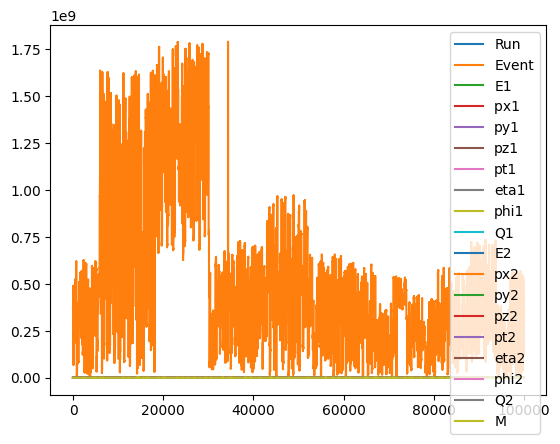

In [22]:
df.plot()

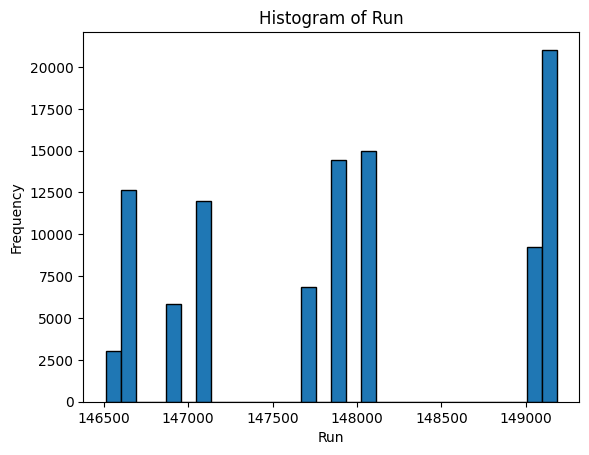

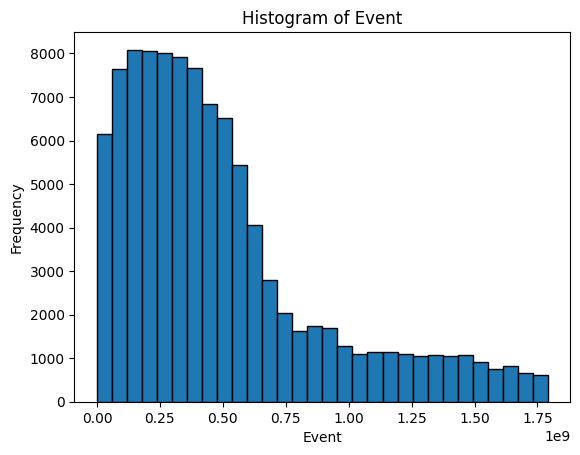

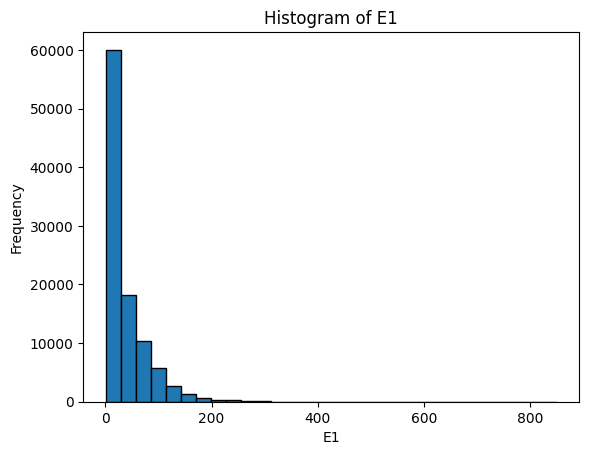

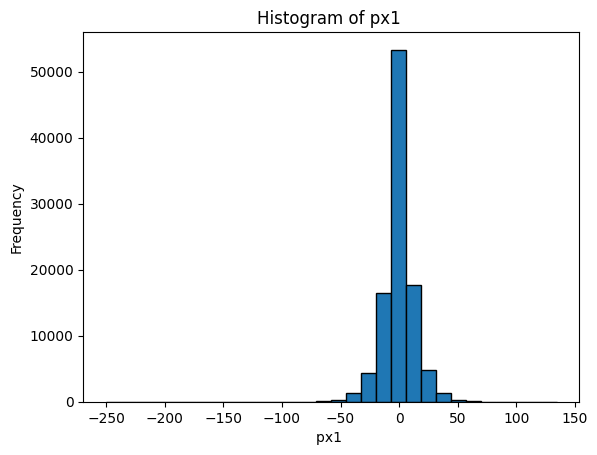

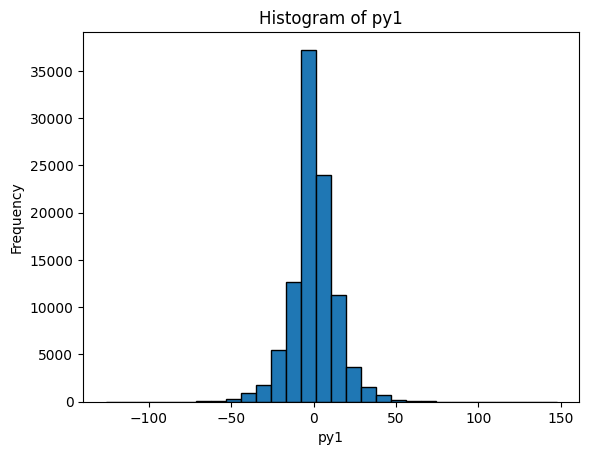

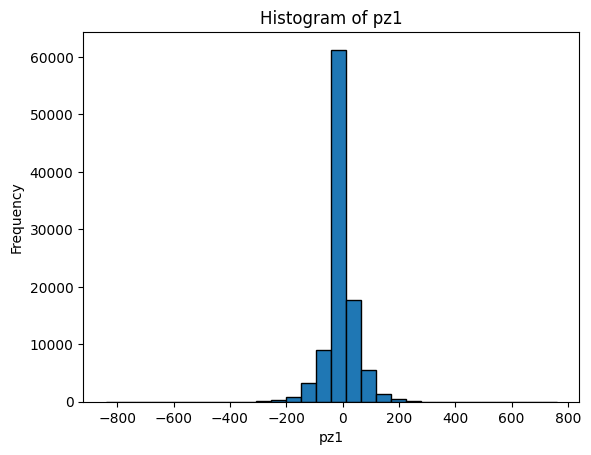

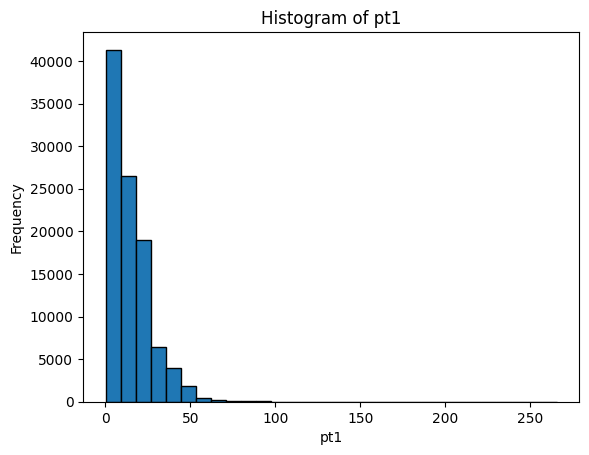

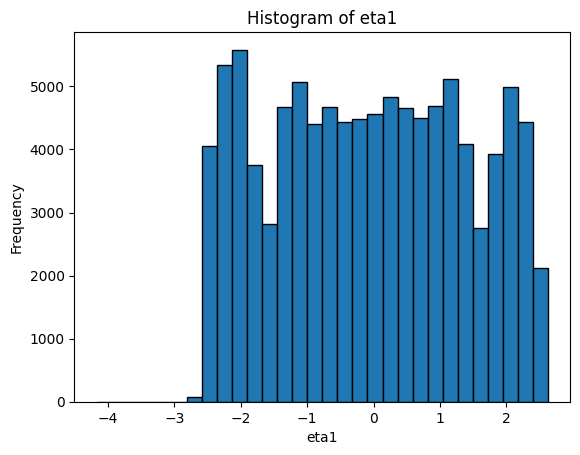

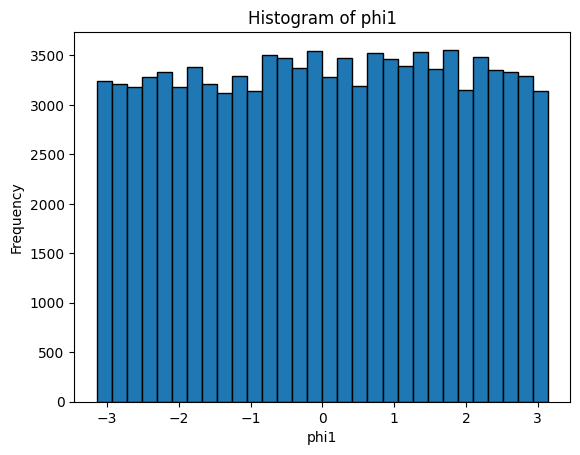

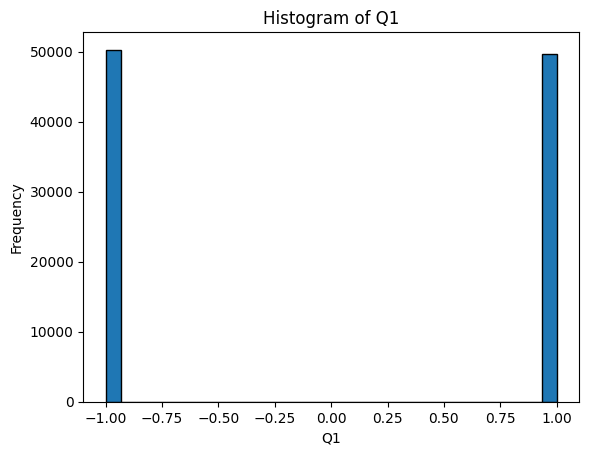

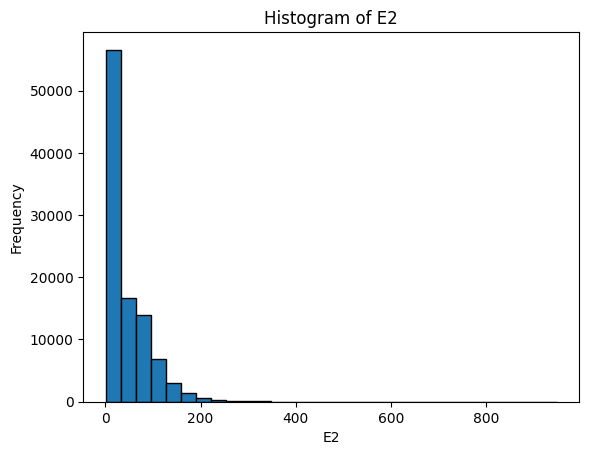

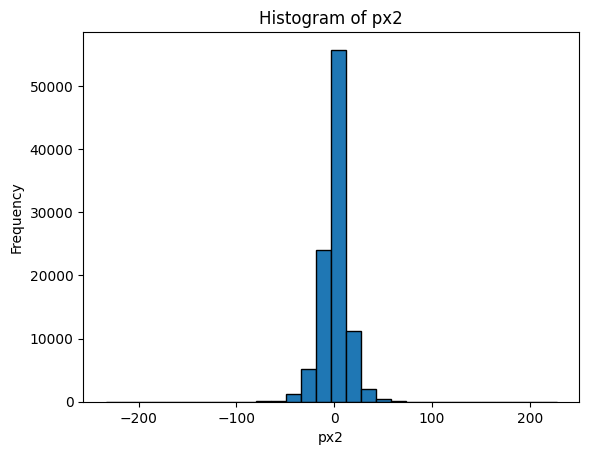

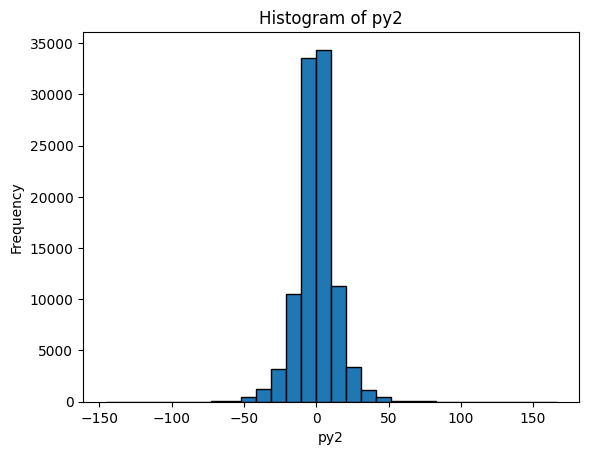

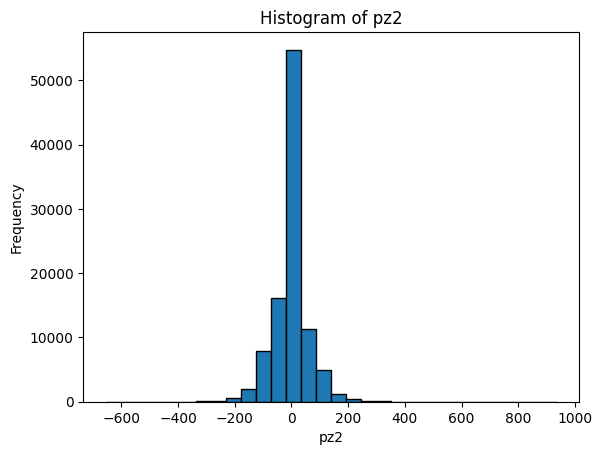

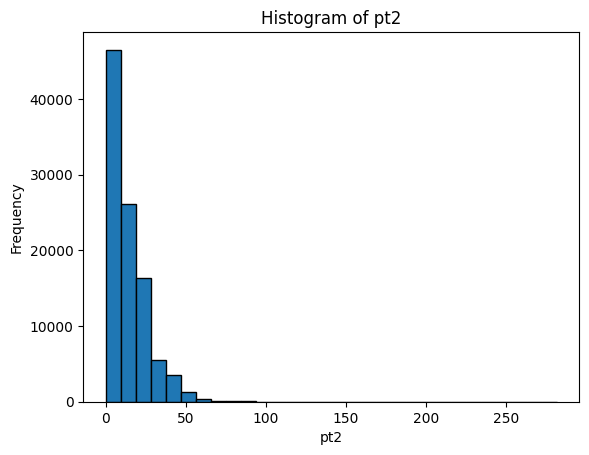

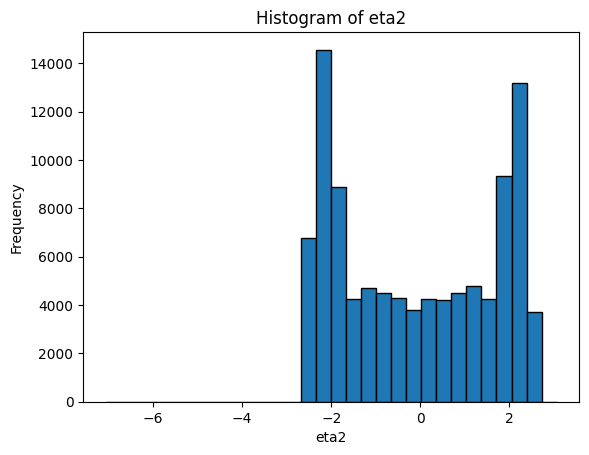

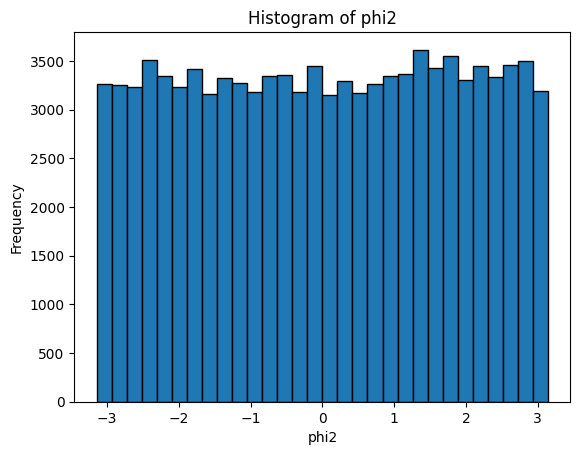

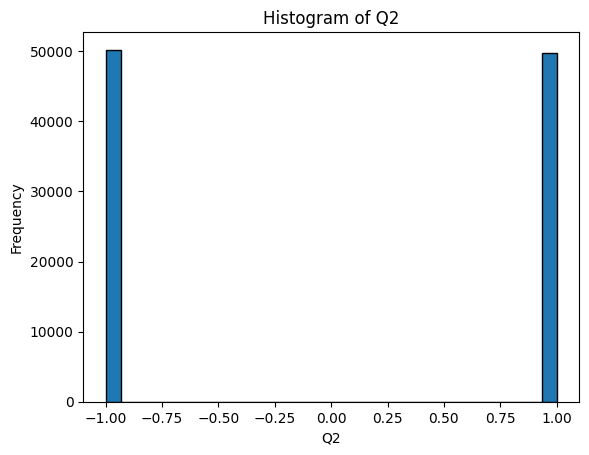

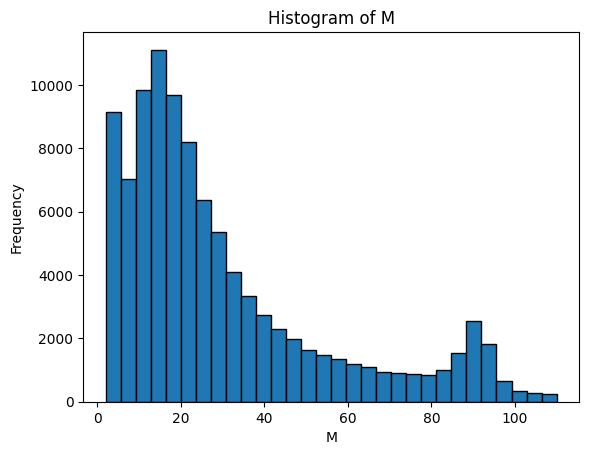

In [36]:
for column_name in df.columns:
    plt.hist(df[column_name], bins=30, edgecolor='black')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column_name)
    plt.show()

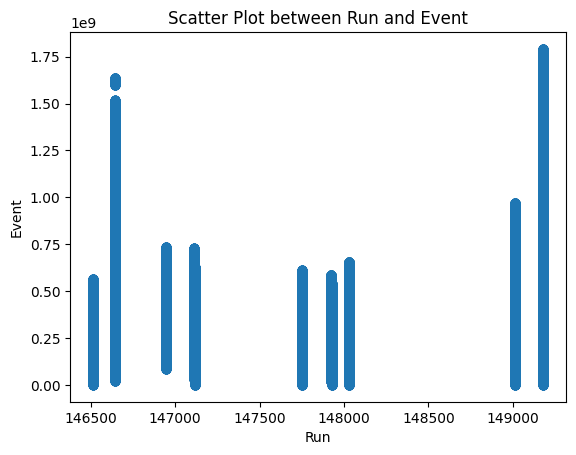

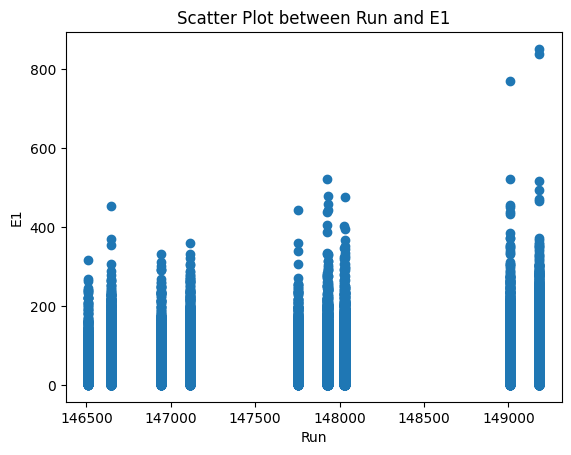

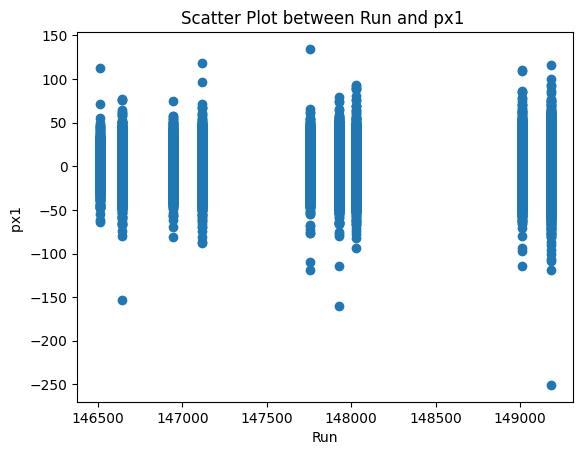

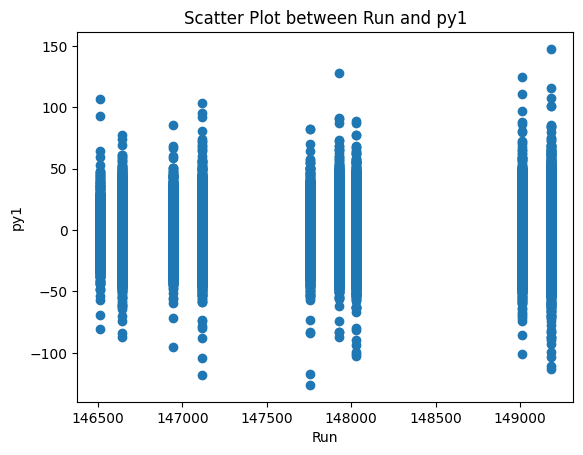

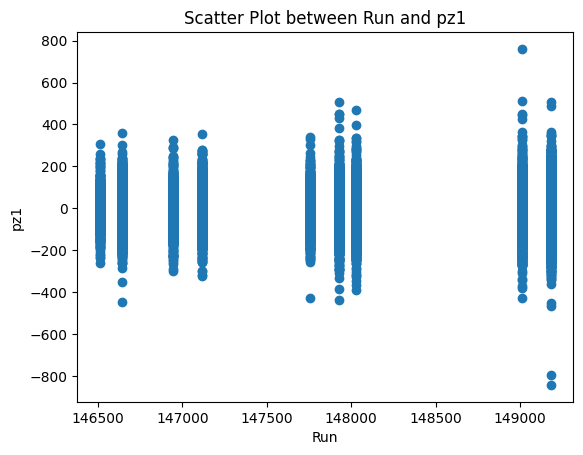

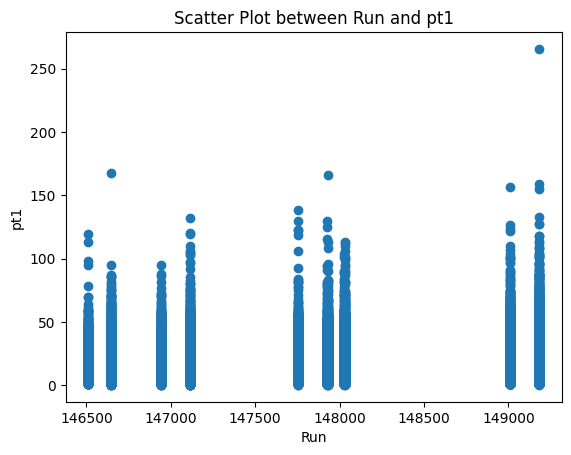

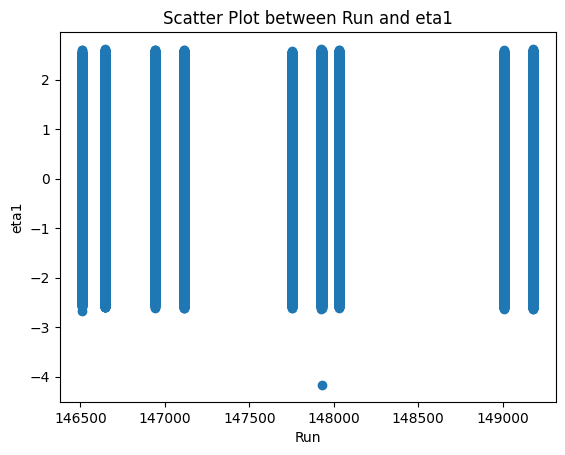

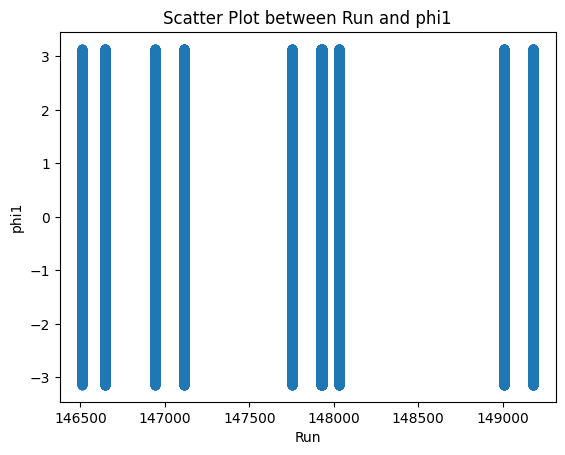

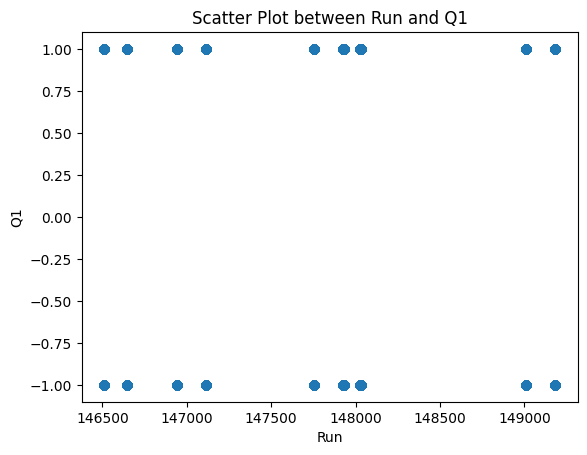

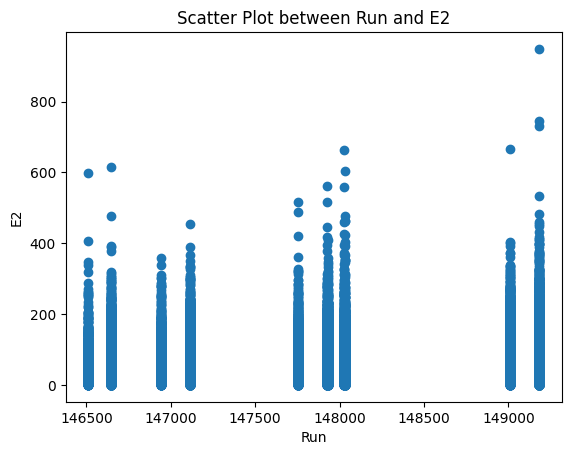

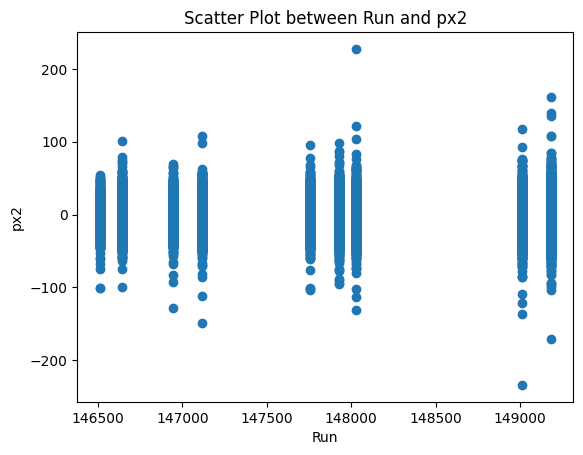

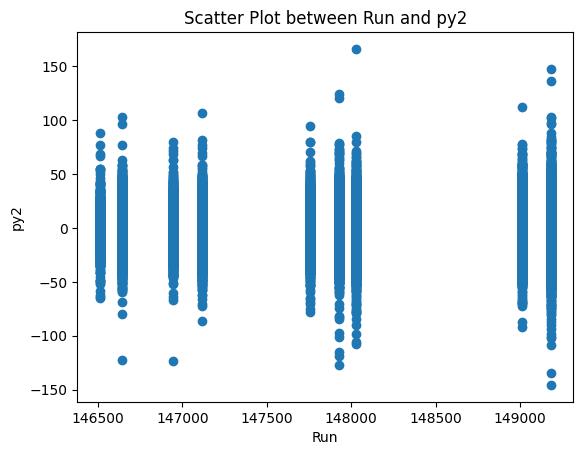

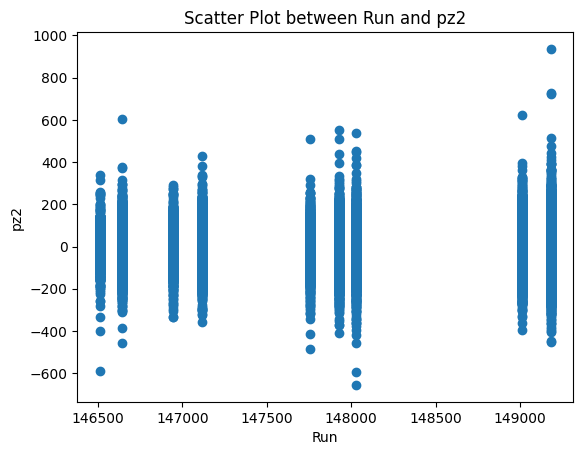

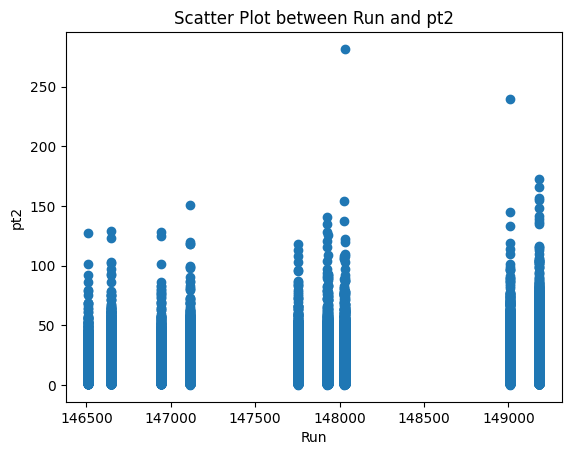

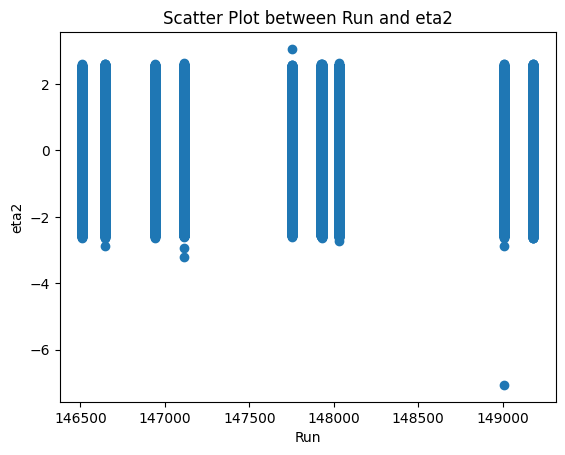

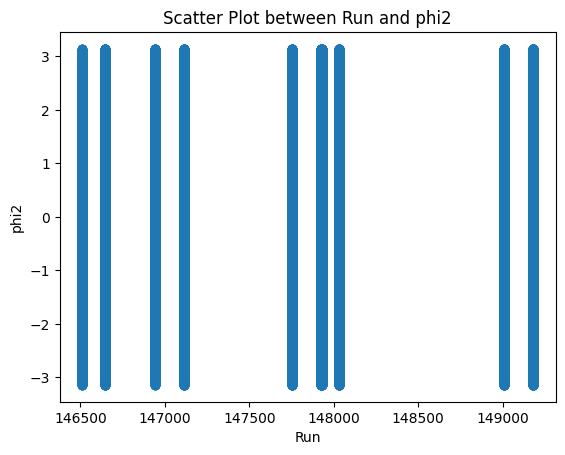

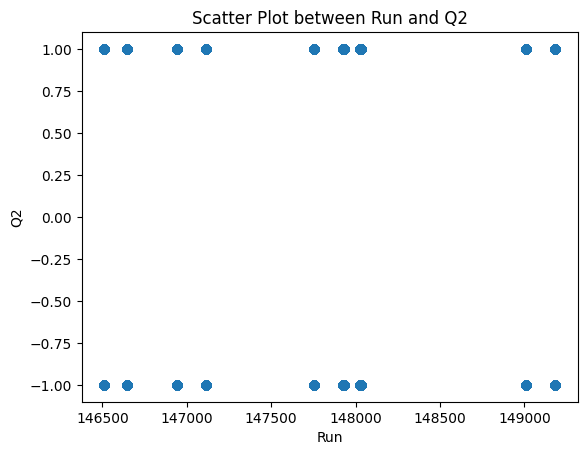

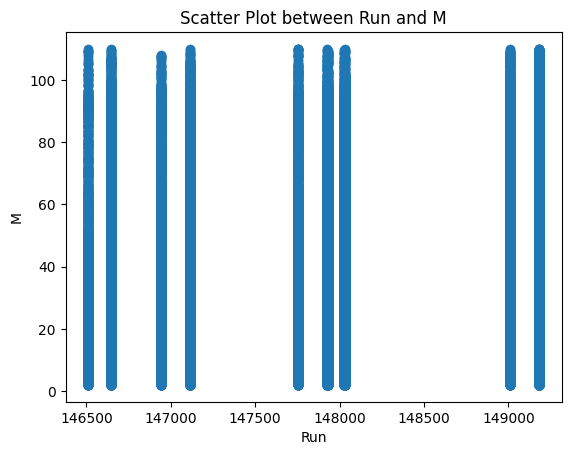

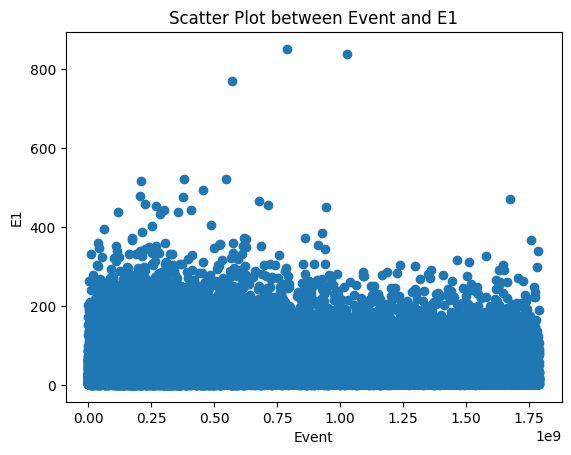

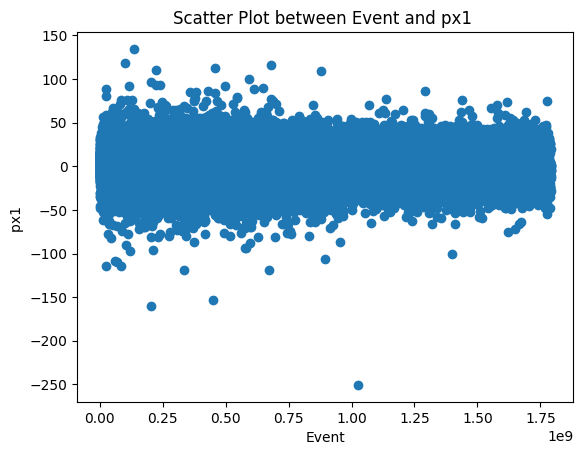

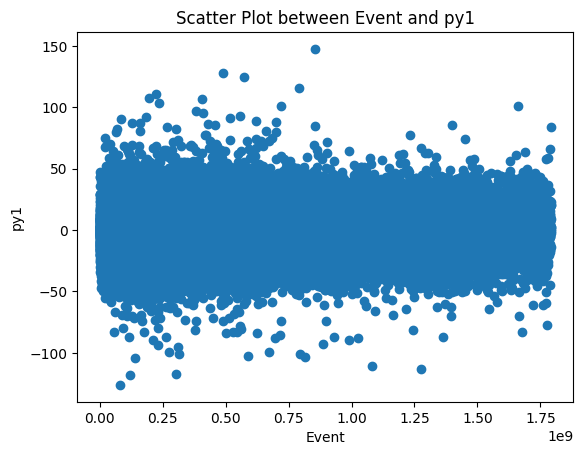

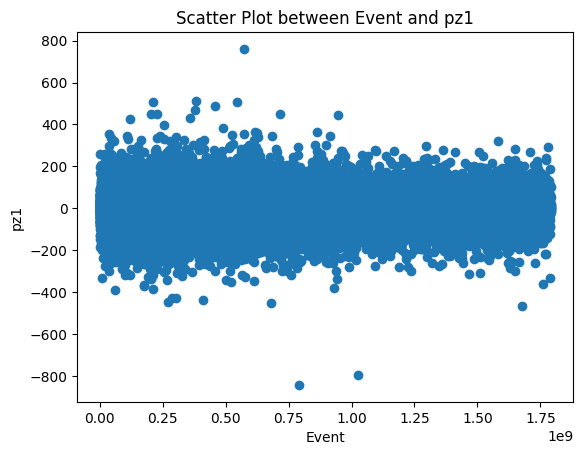

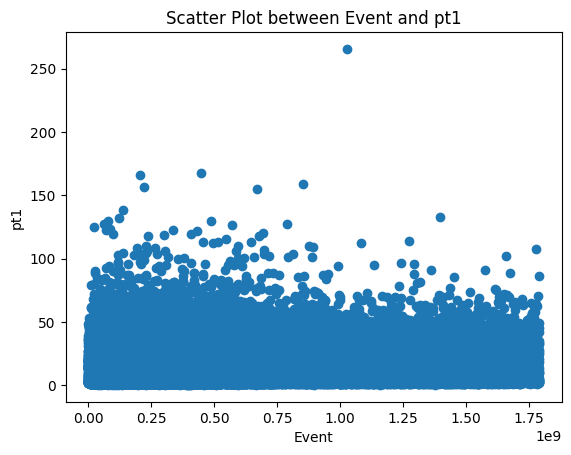

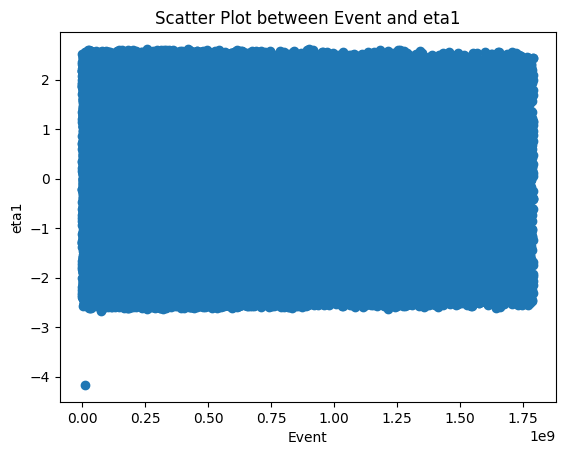

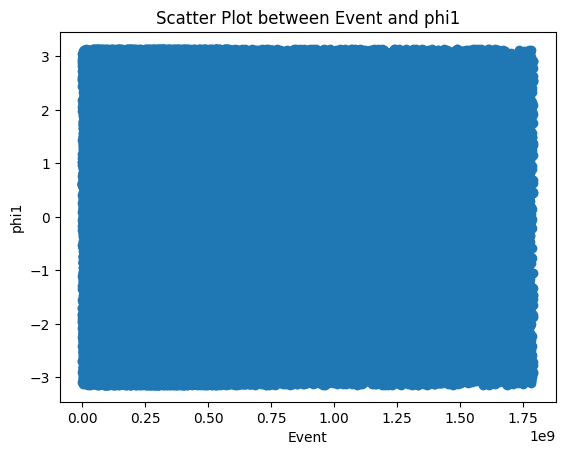

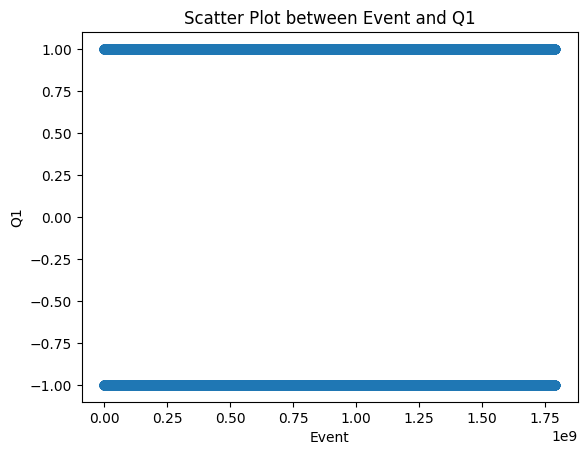

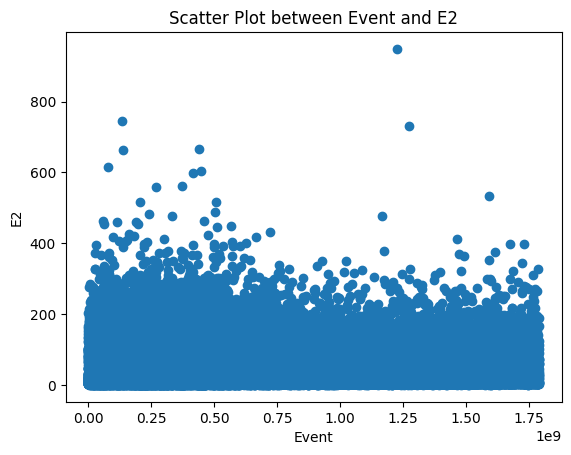

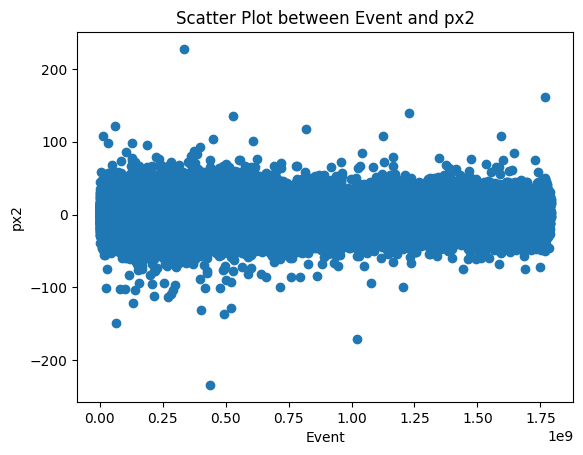

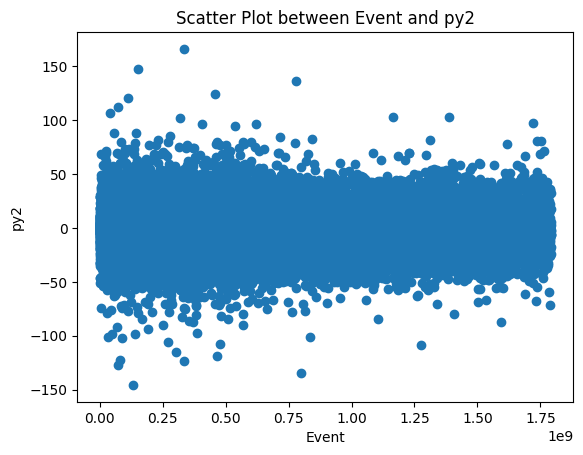

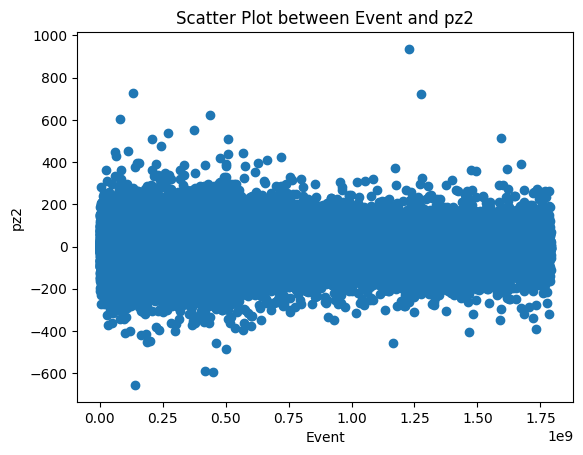

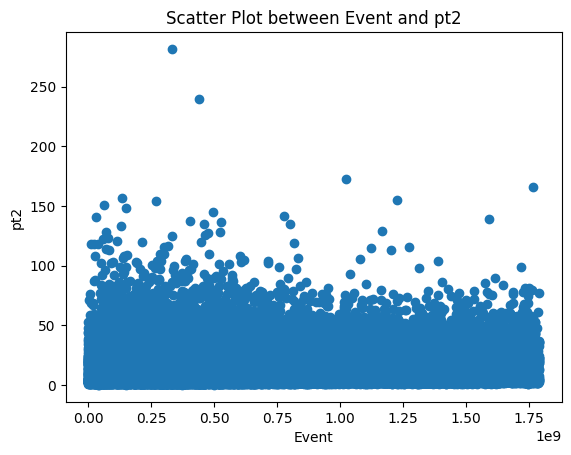

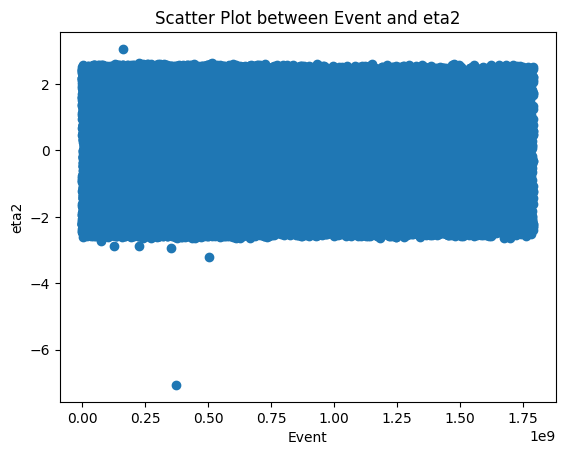

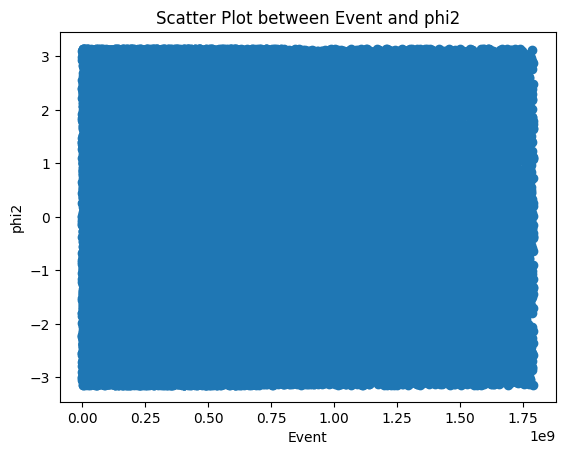

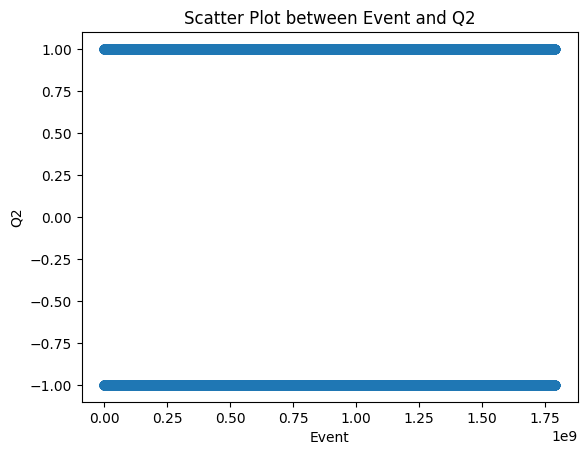

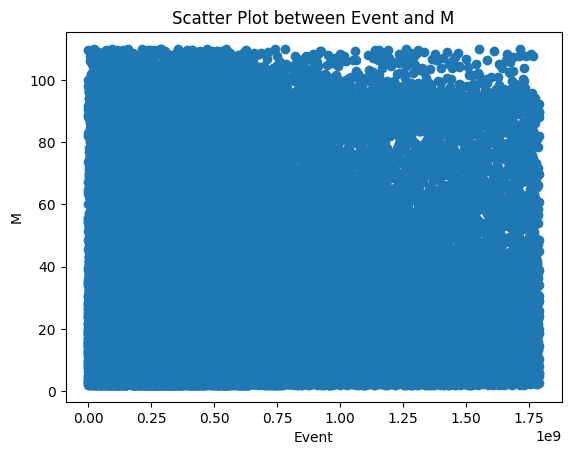

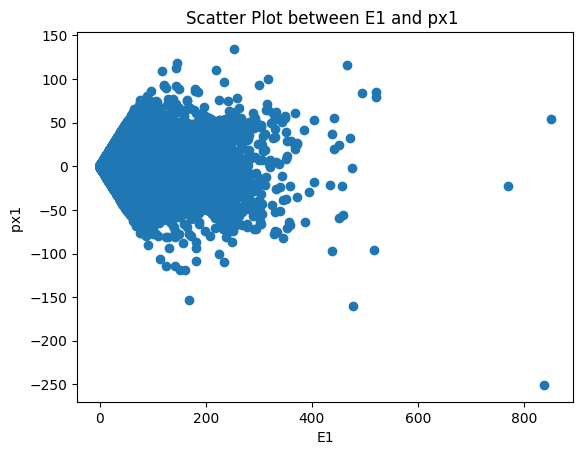

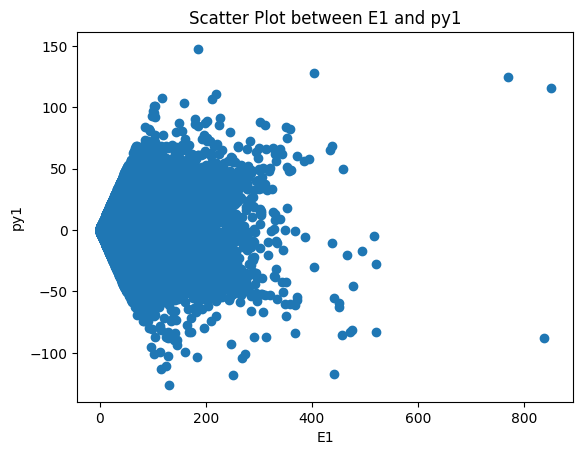

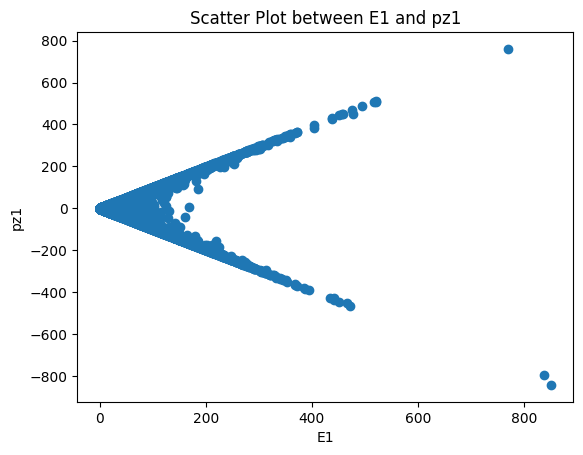

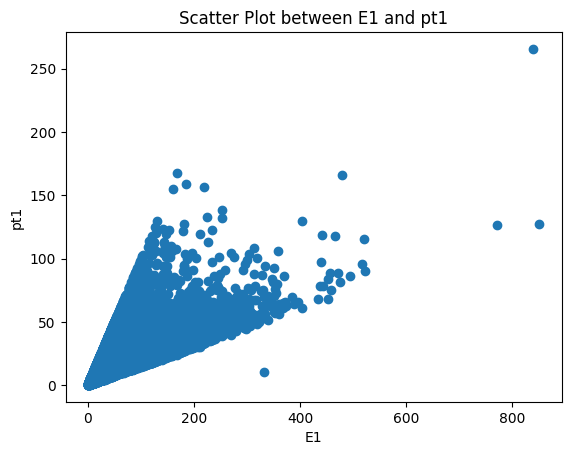

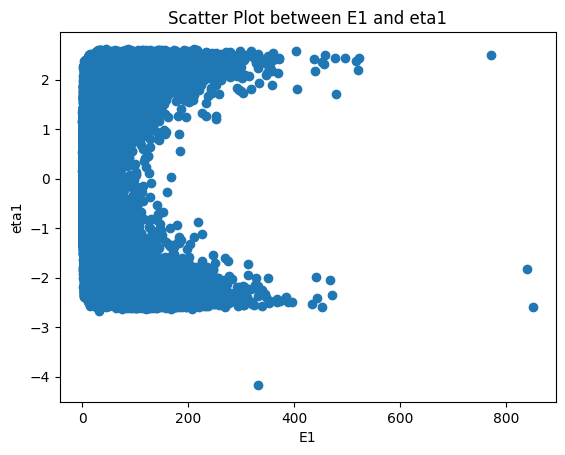

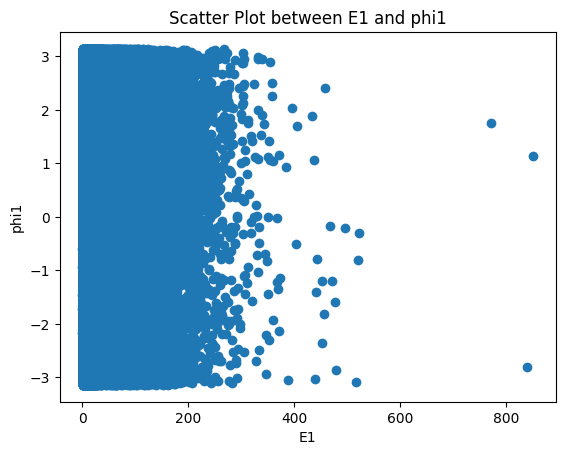

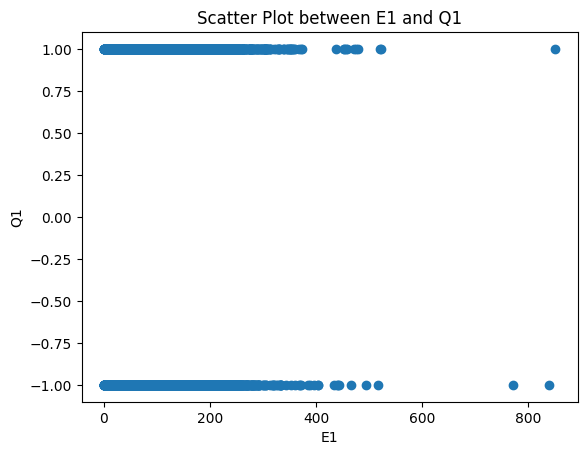

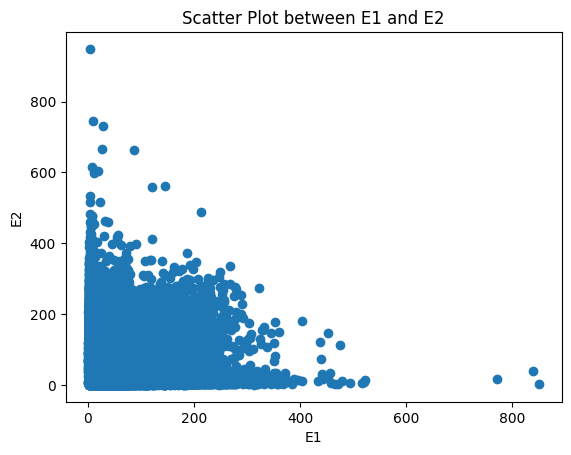

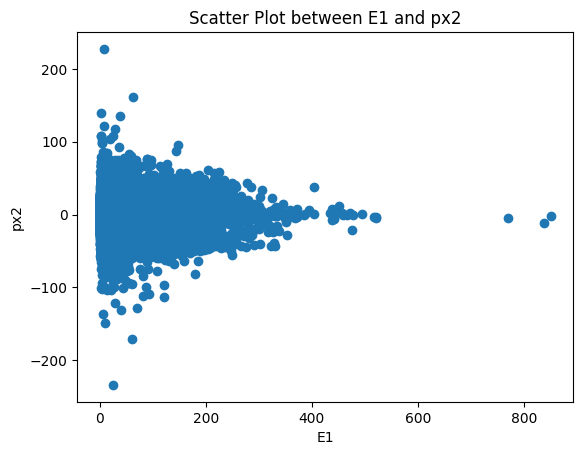

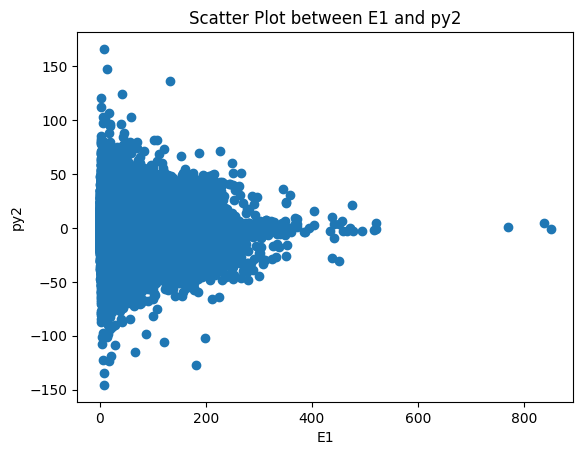

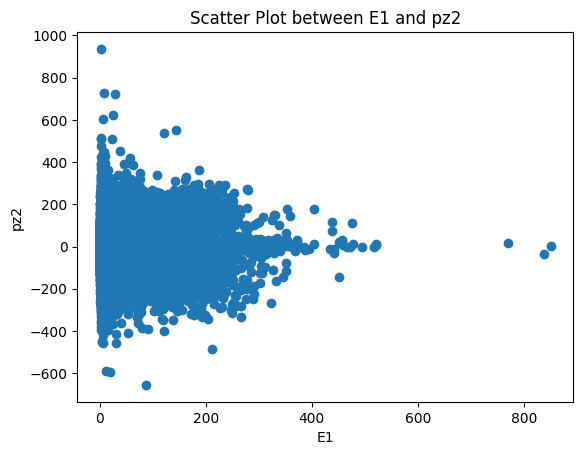

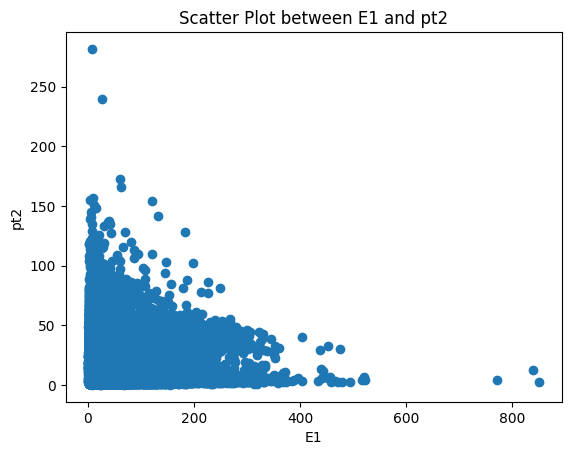

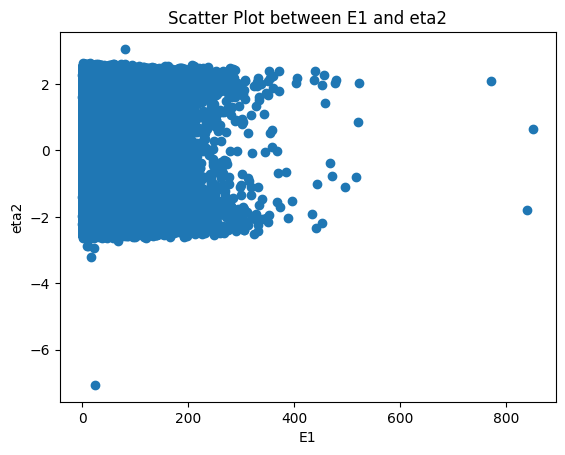

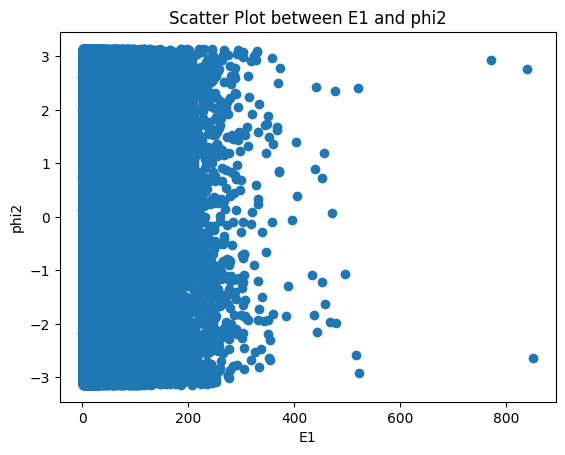

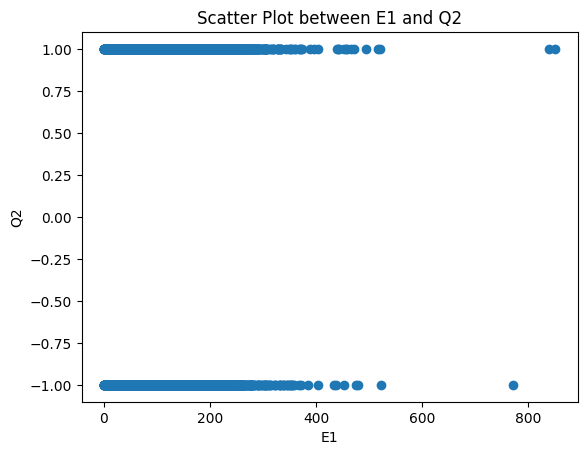

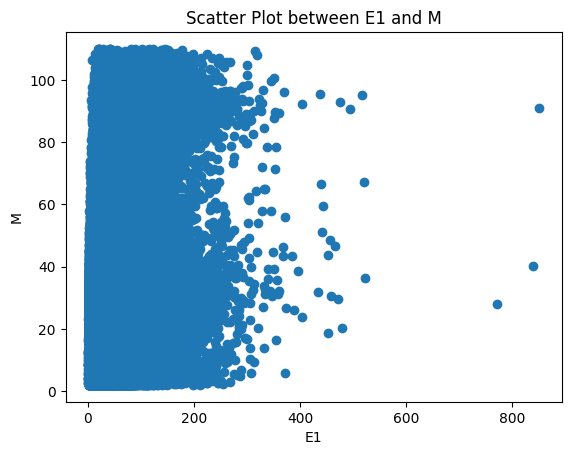

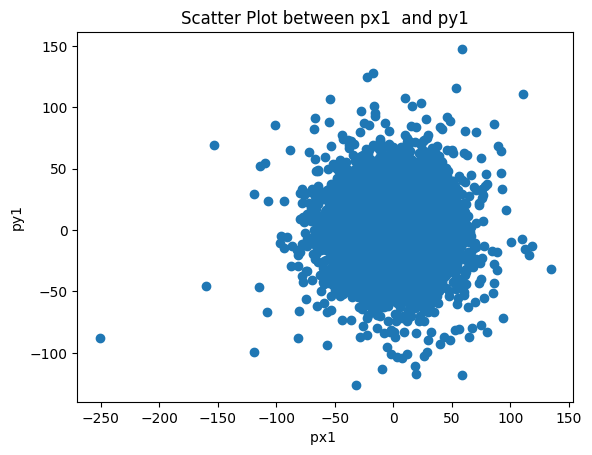

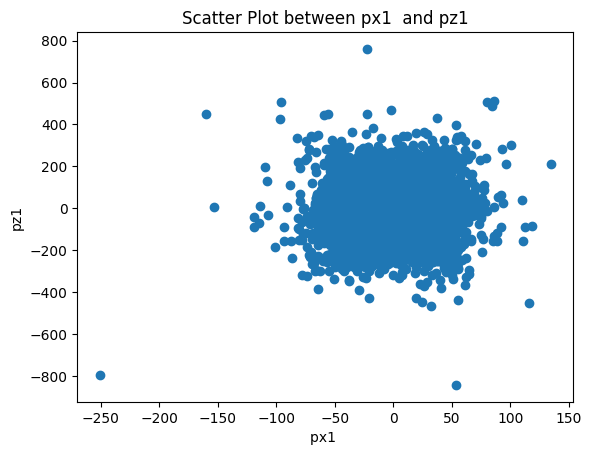

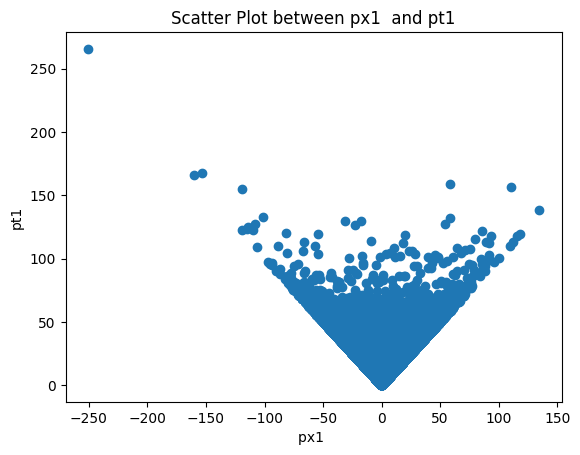

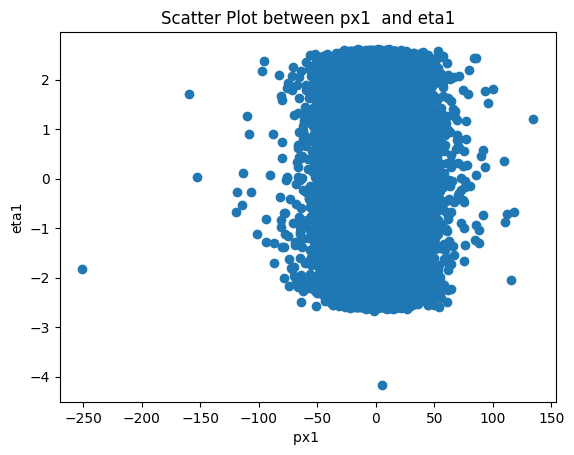

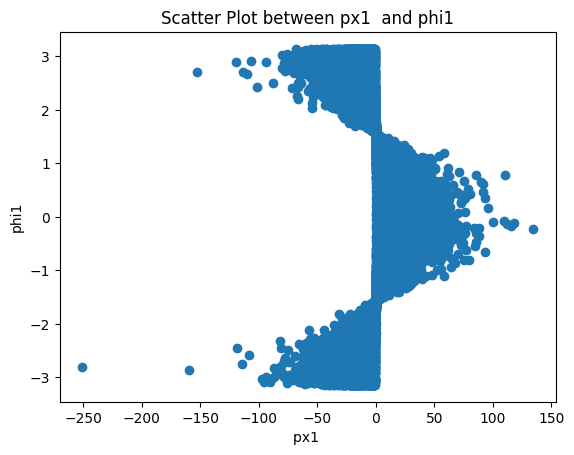

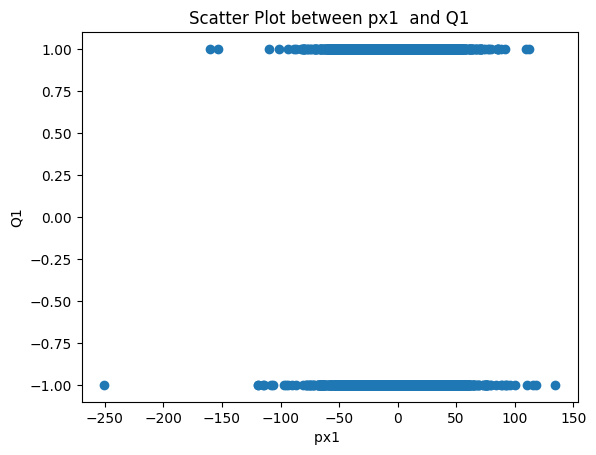

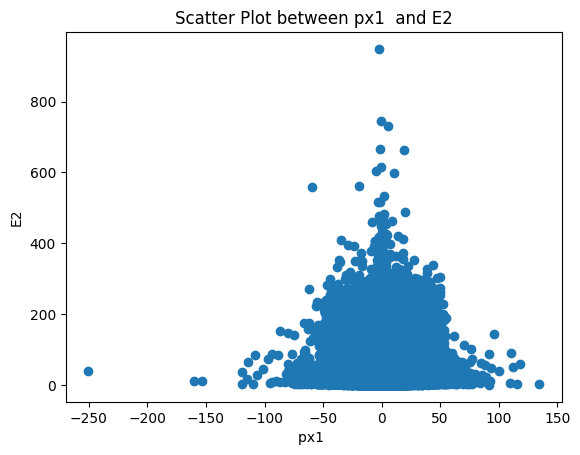

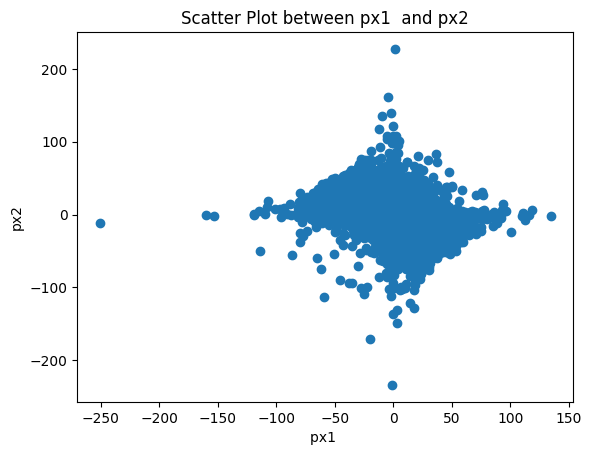

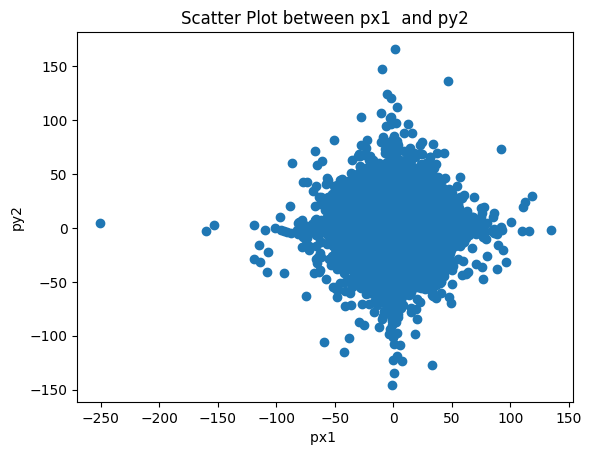

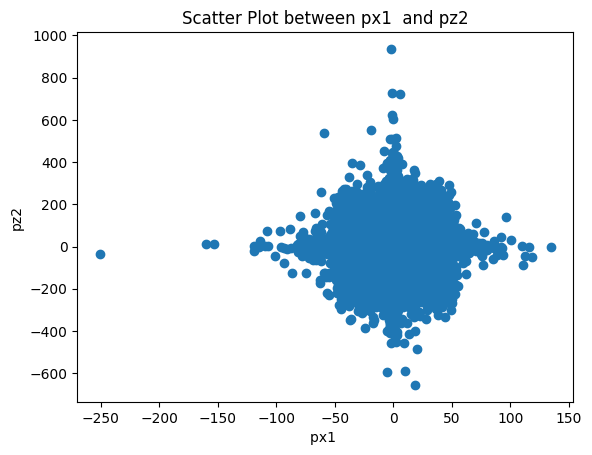

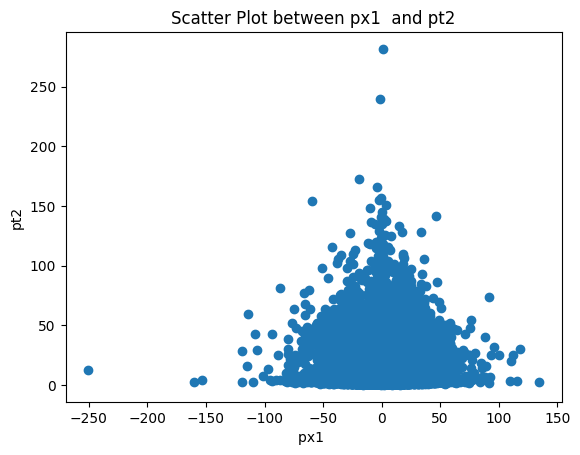

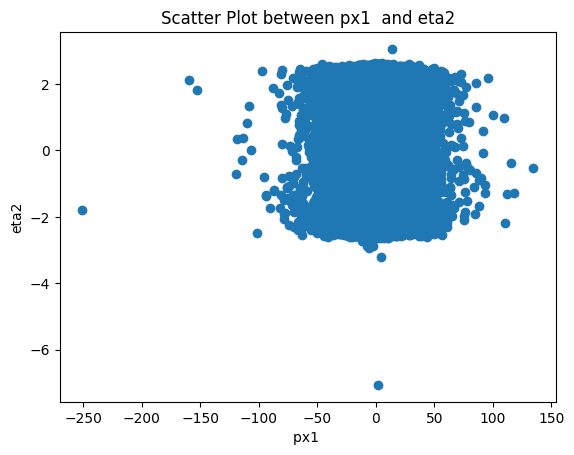

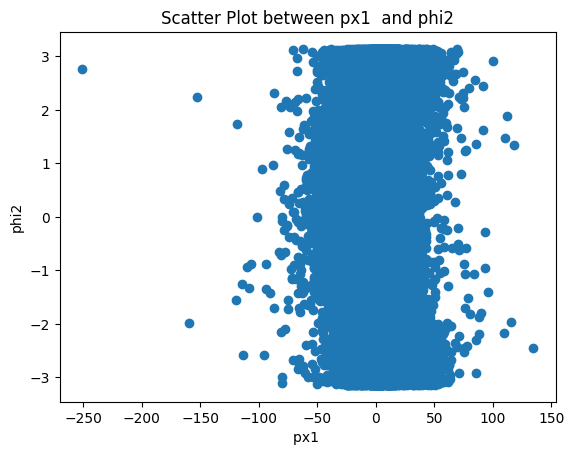

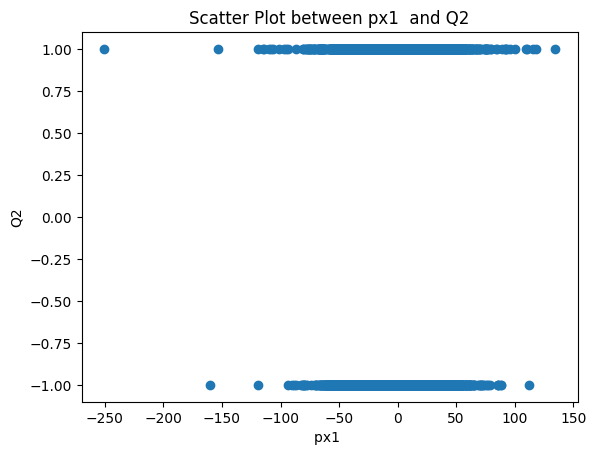

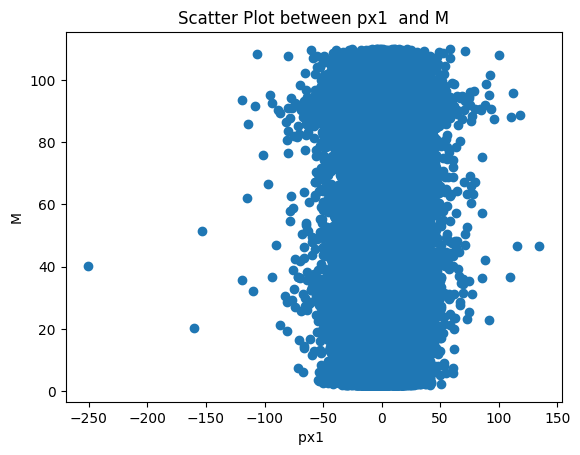

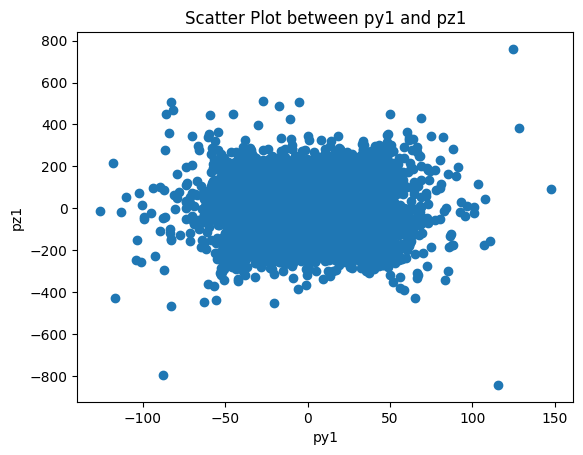

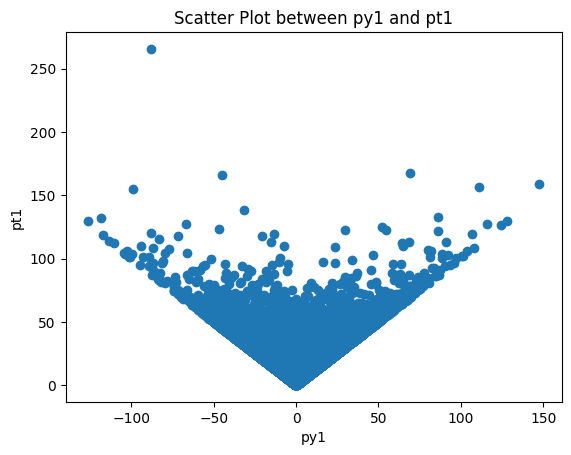

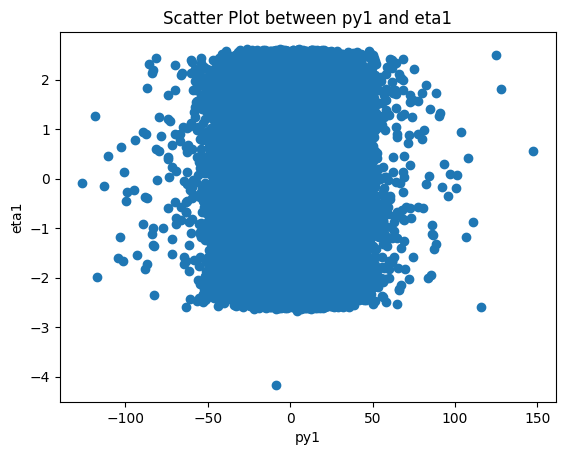

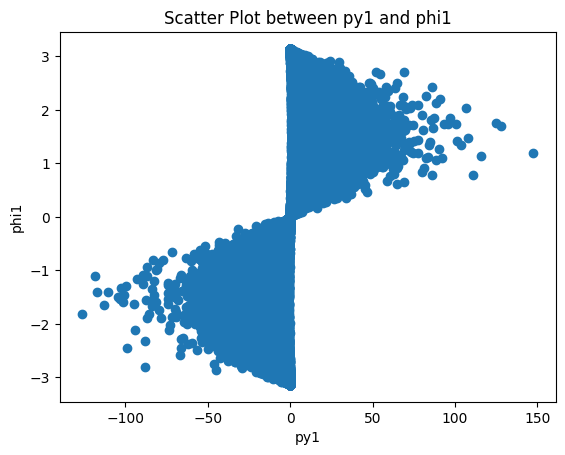

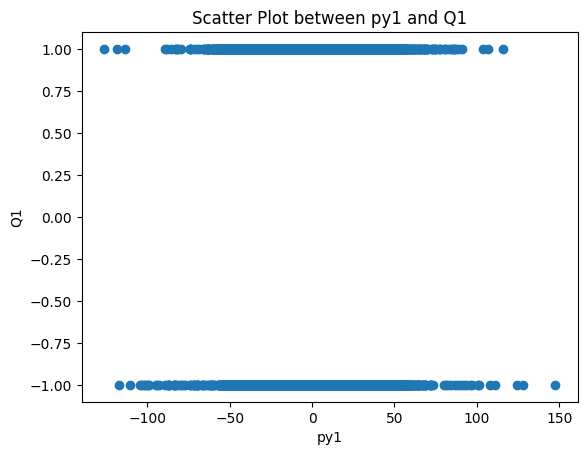

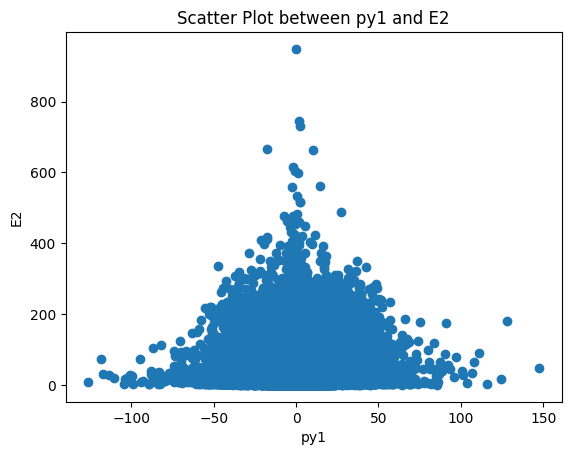

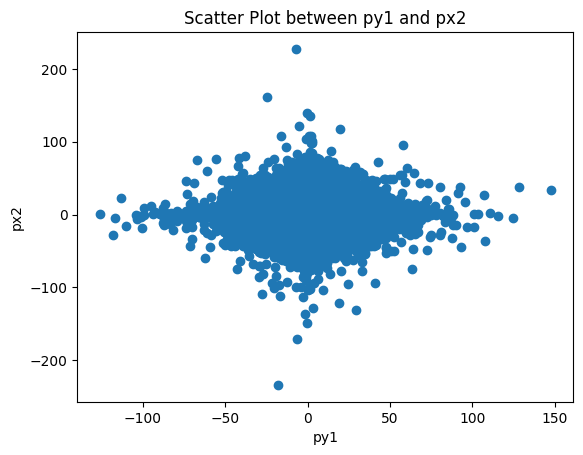

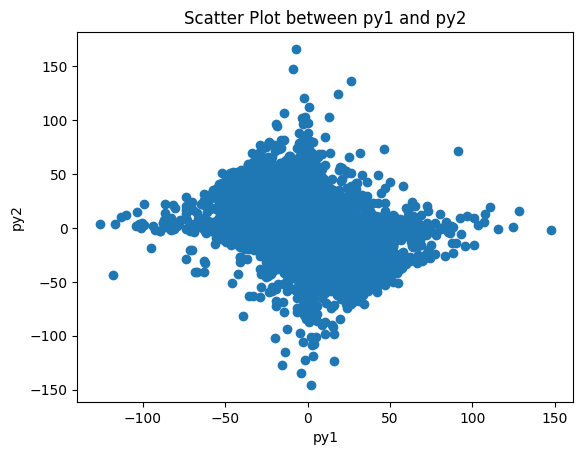

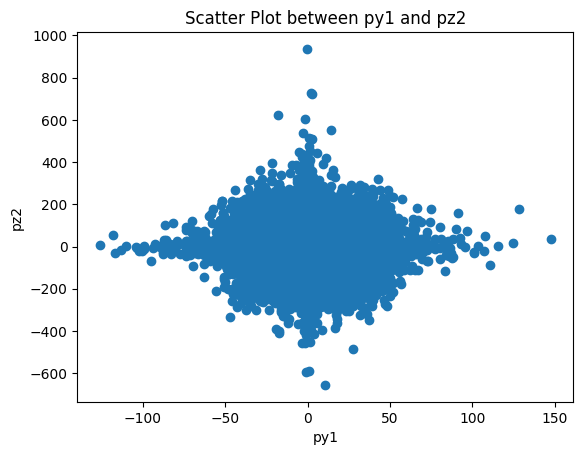

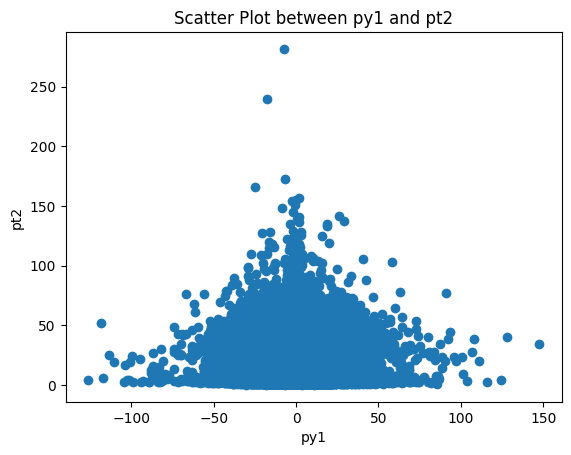

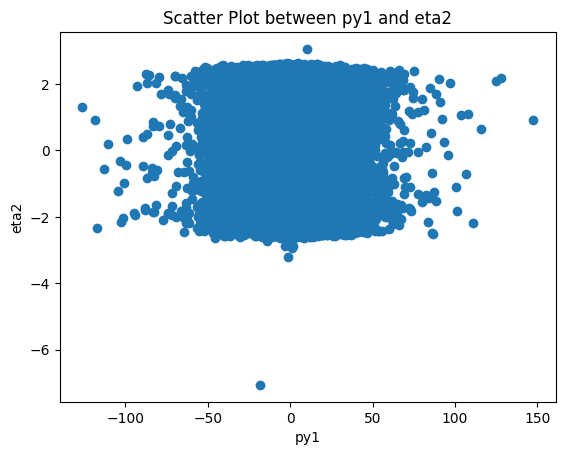

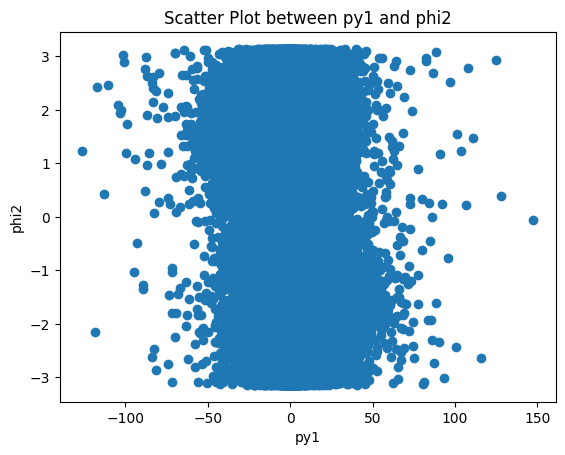

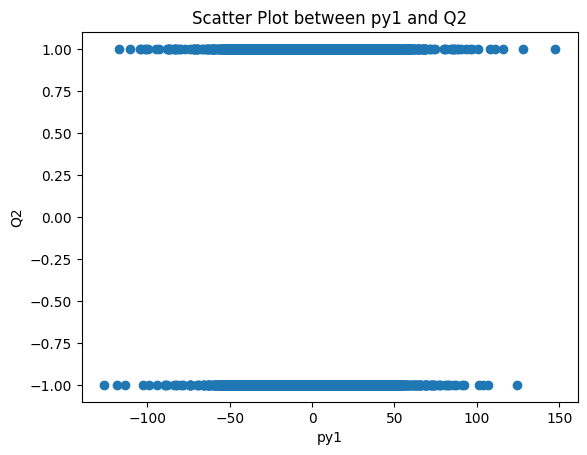

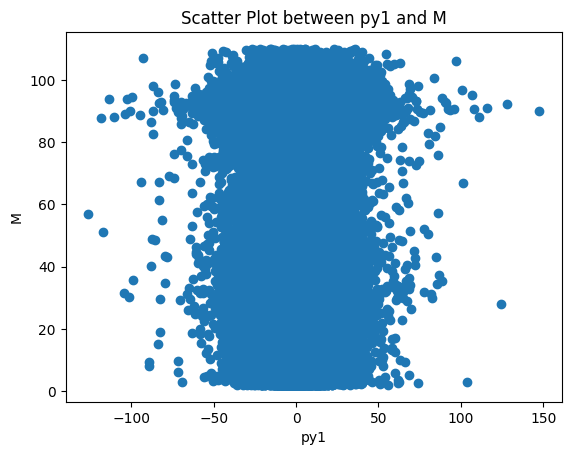

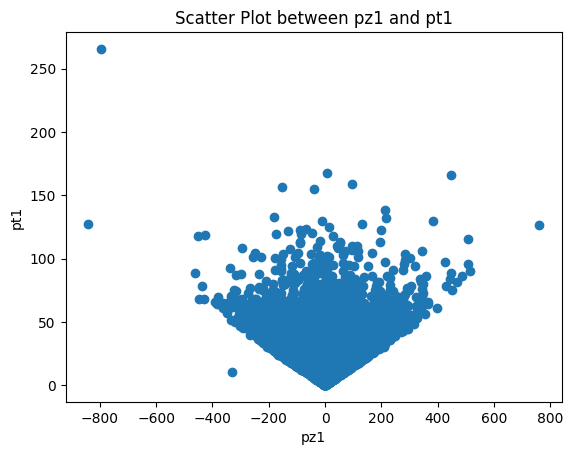

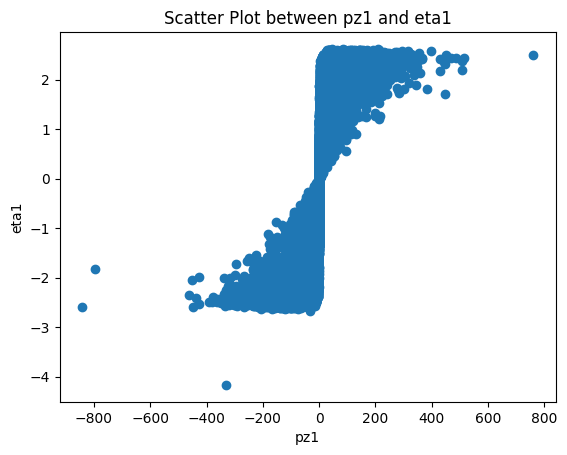

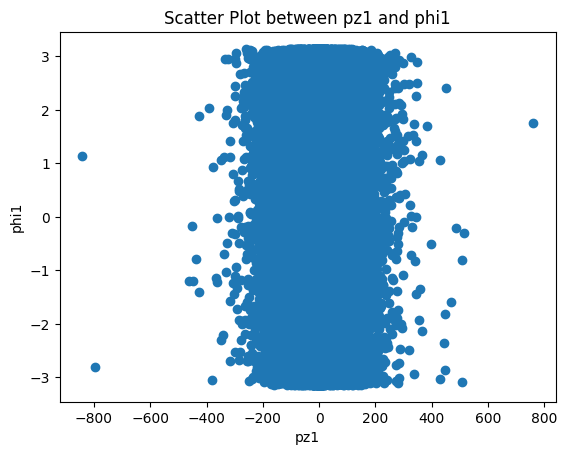

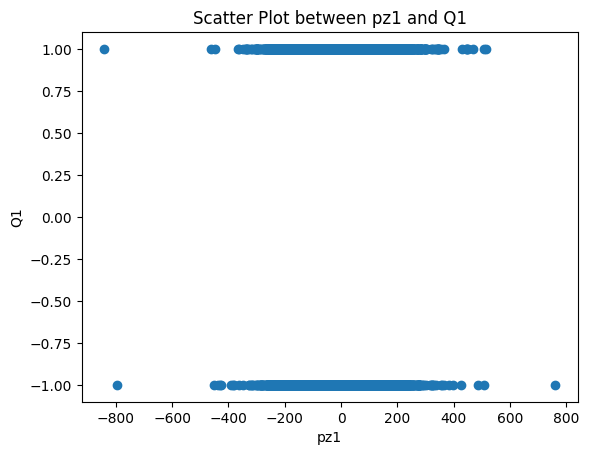

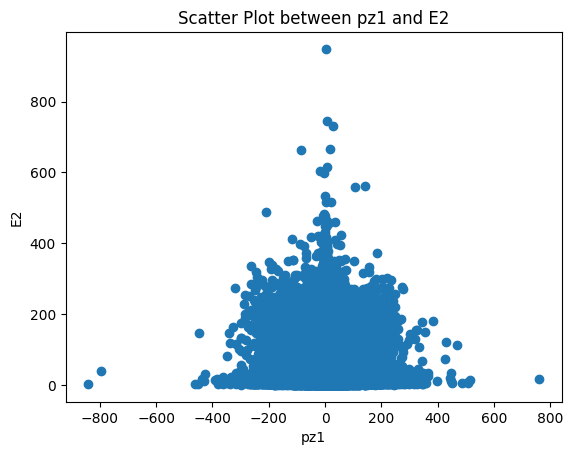

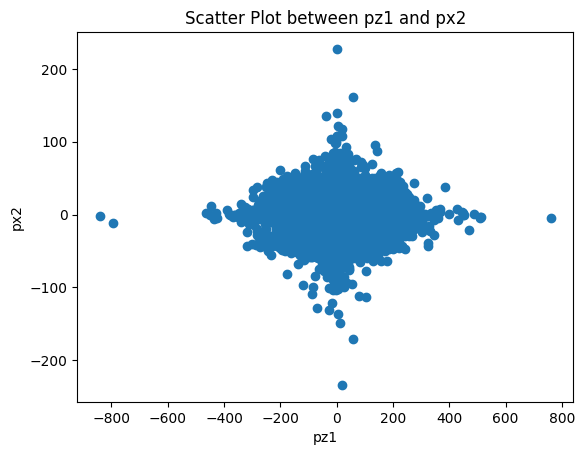

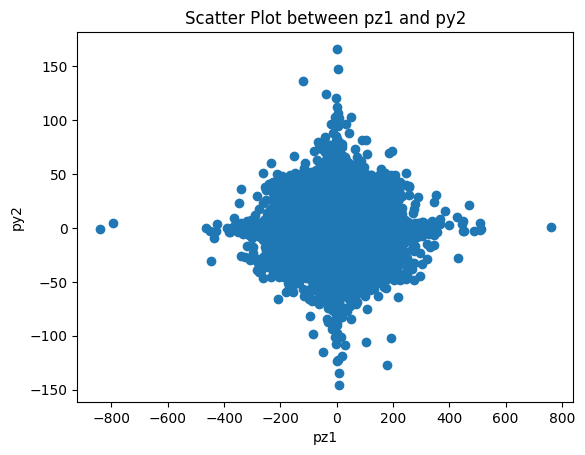

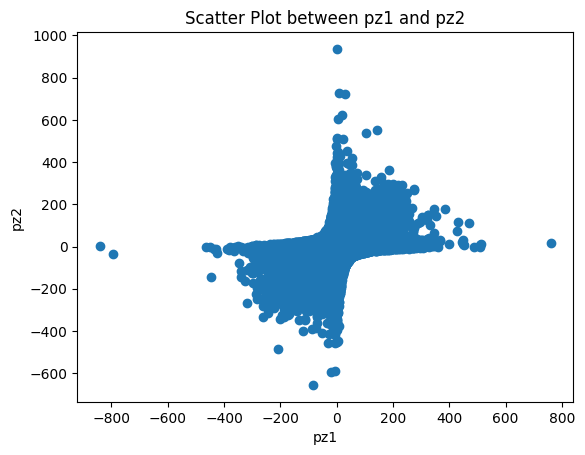

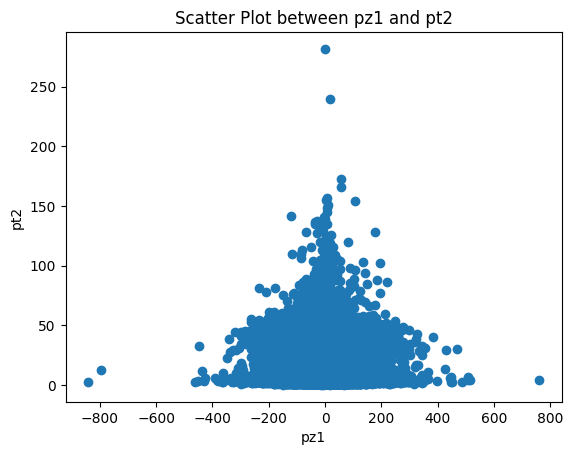

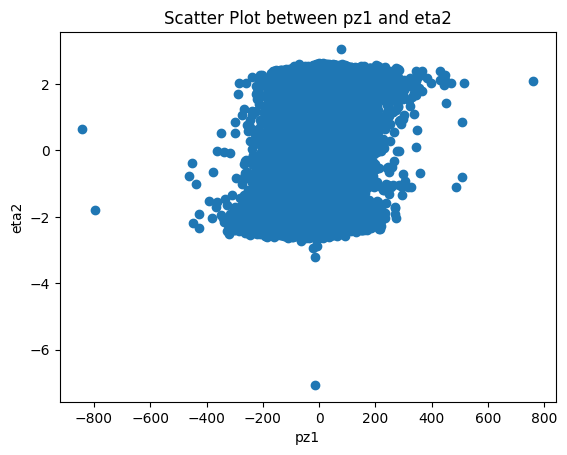

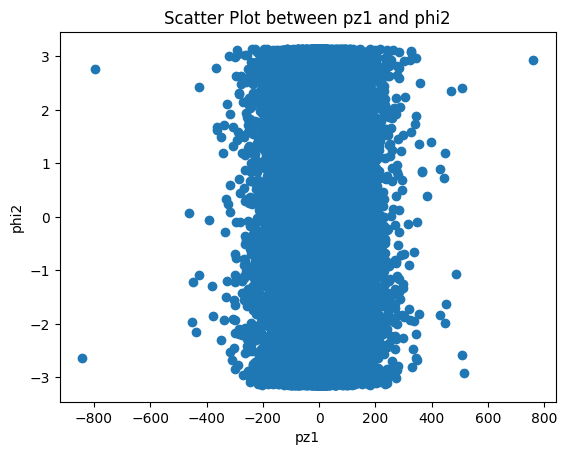

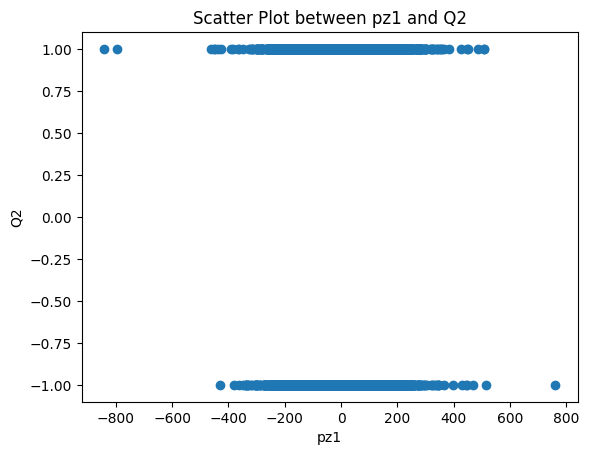

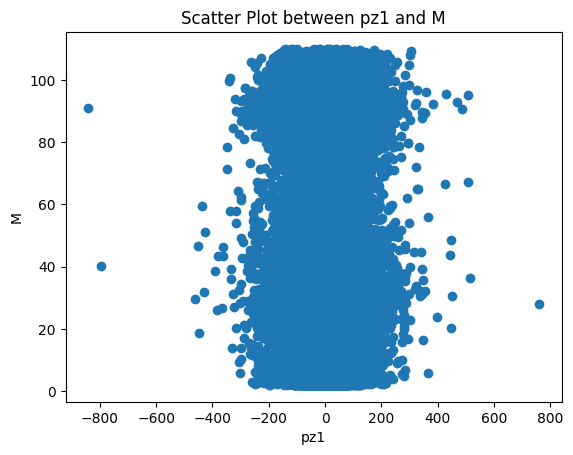

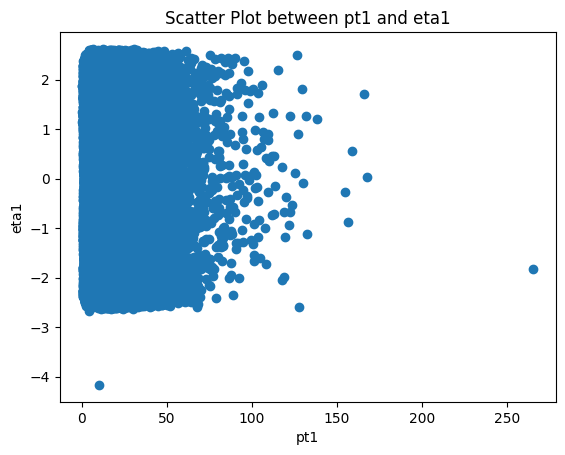

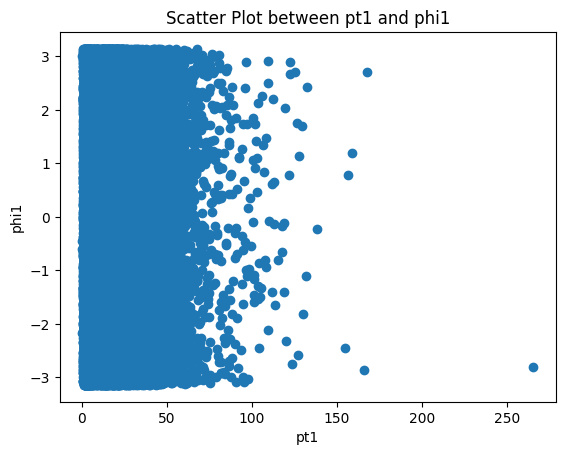

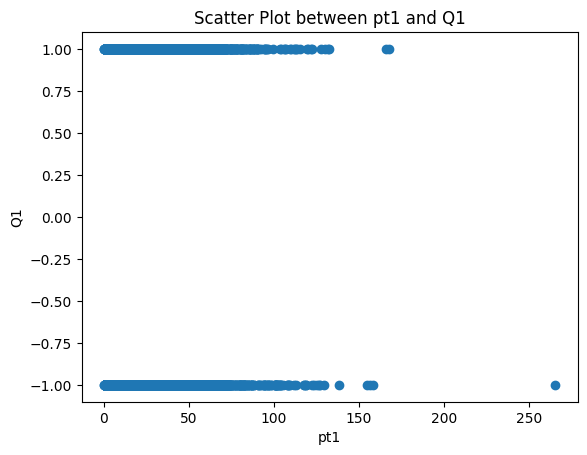

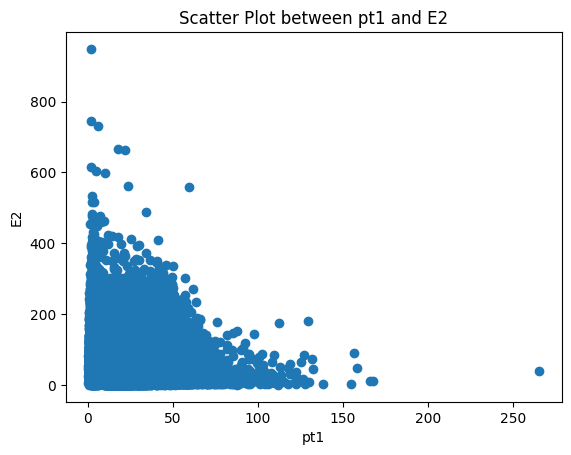

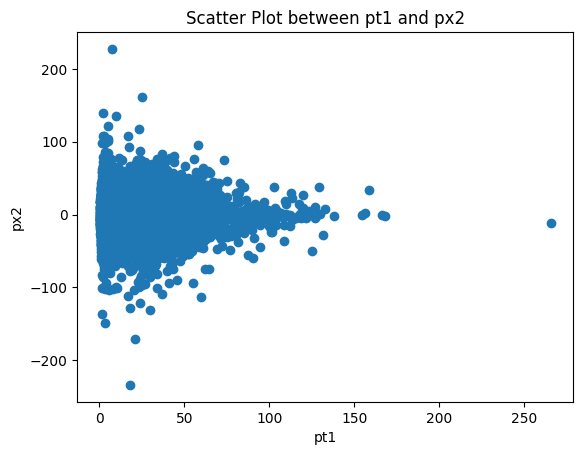

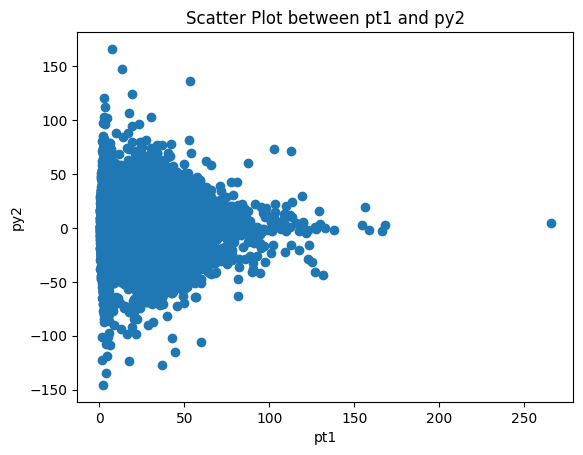

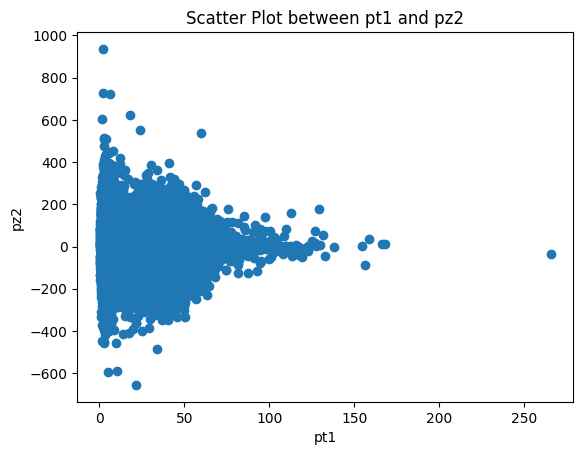

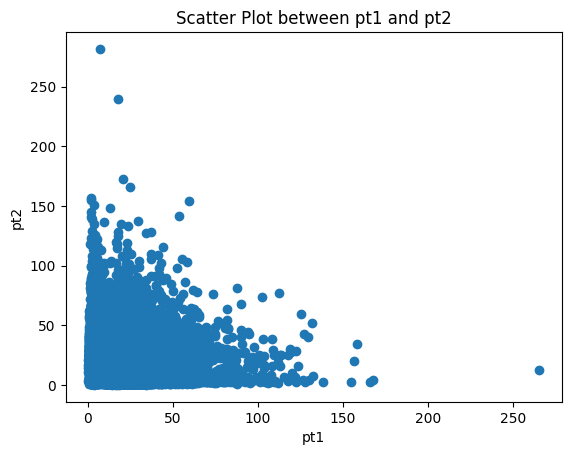

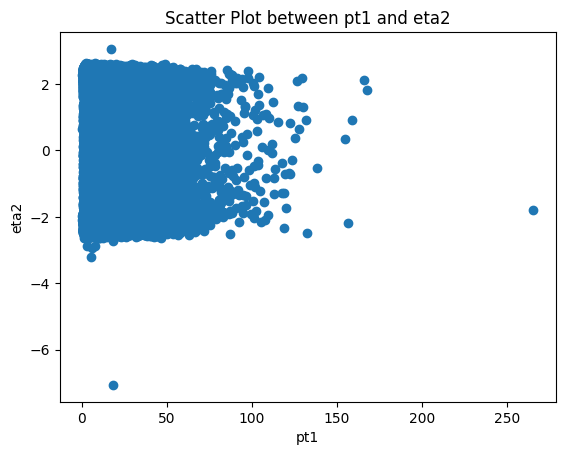

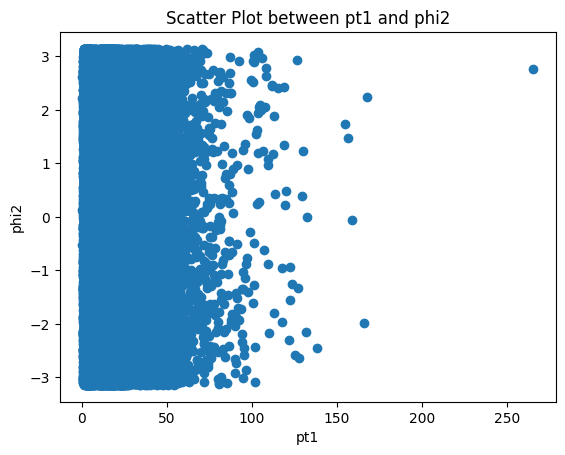

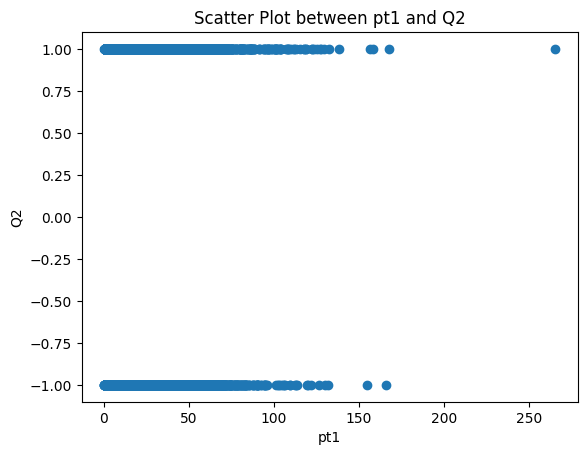

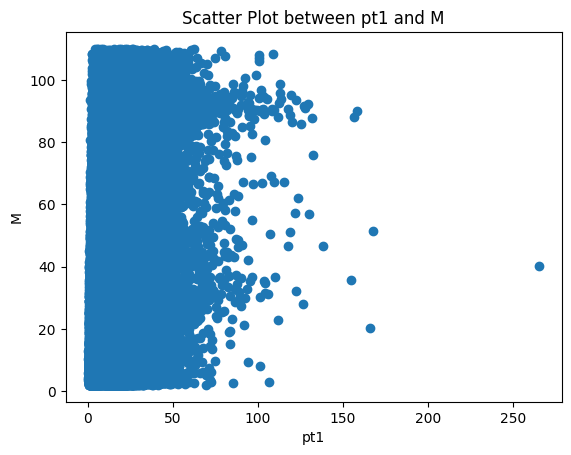

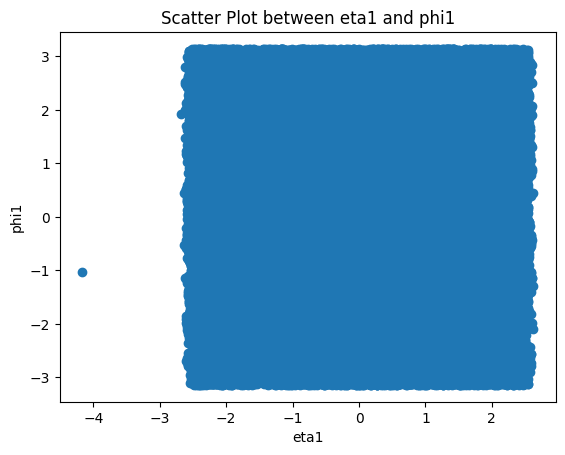

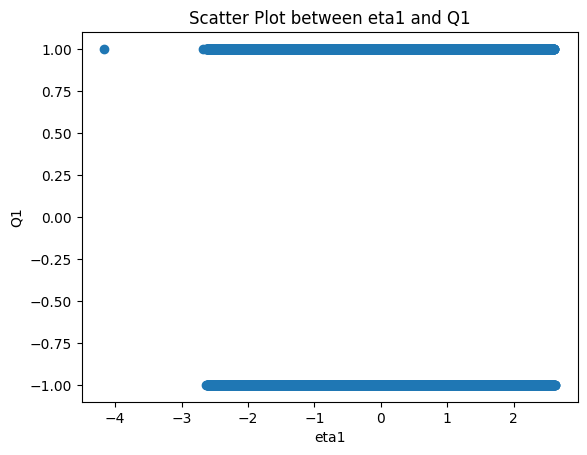

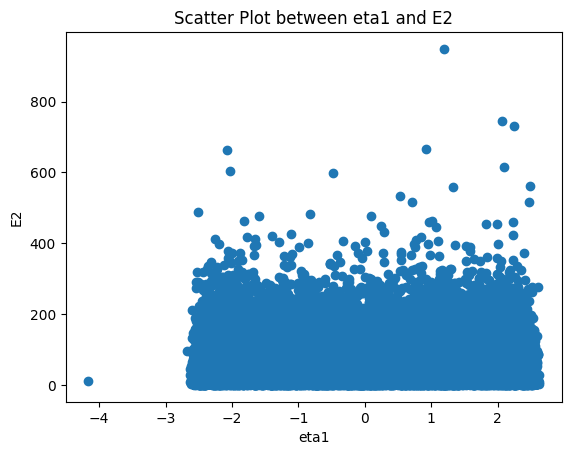

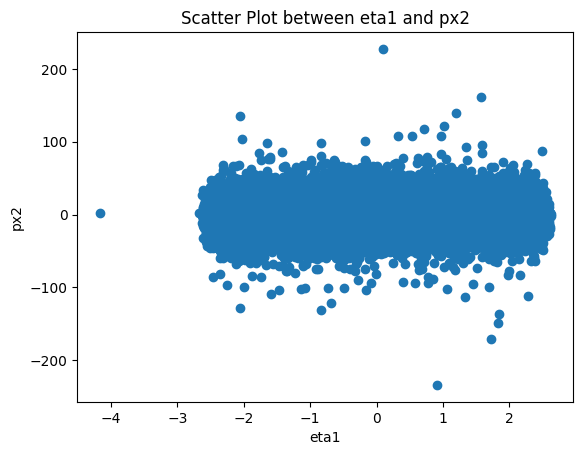

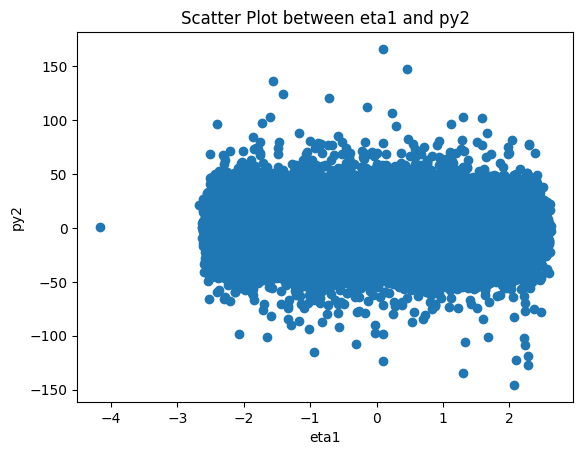

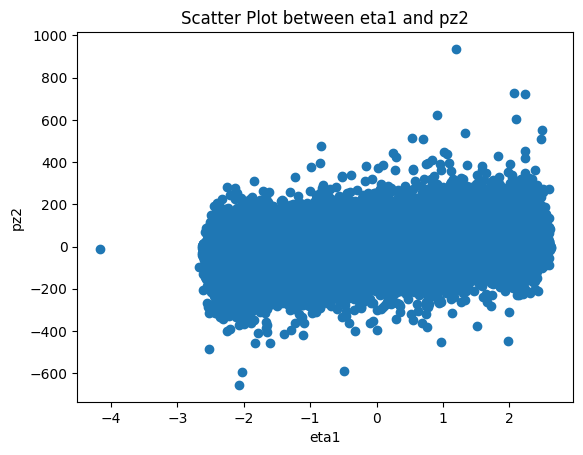

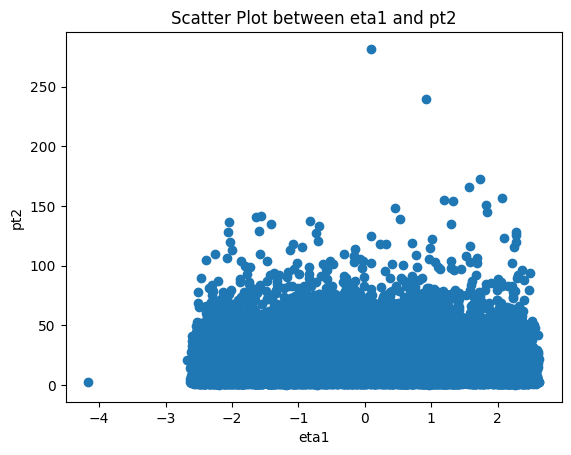

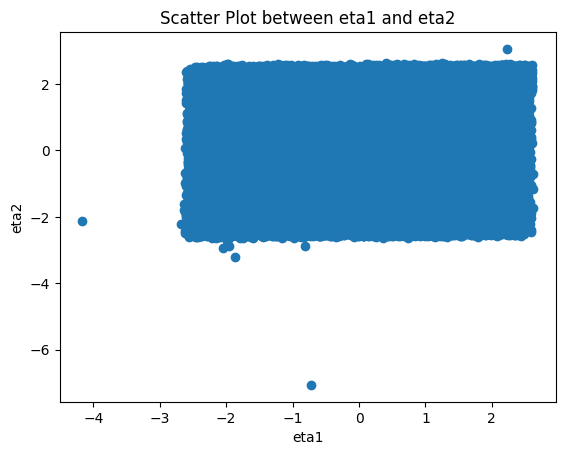

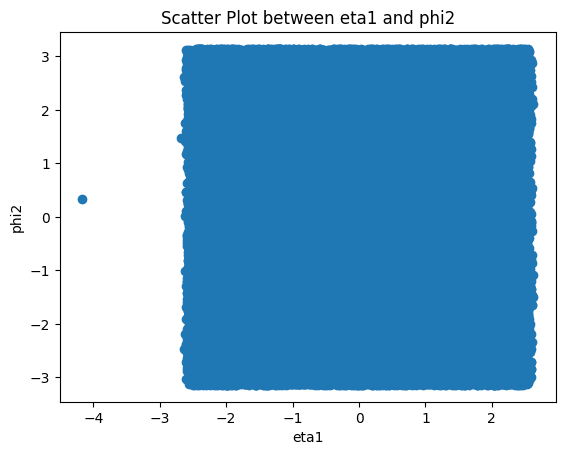

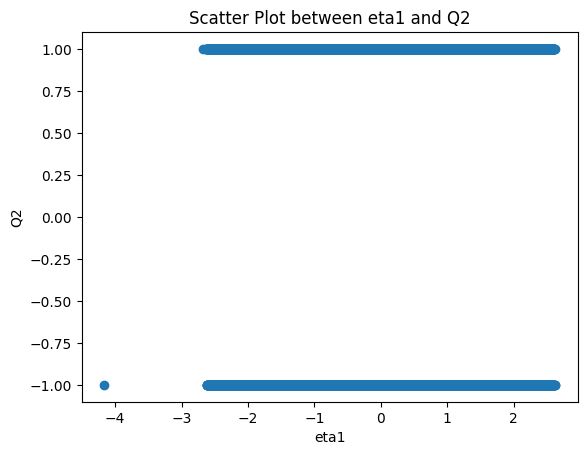

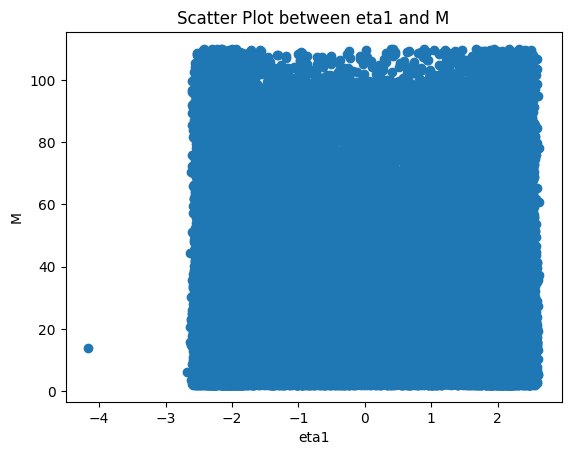

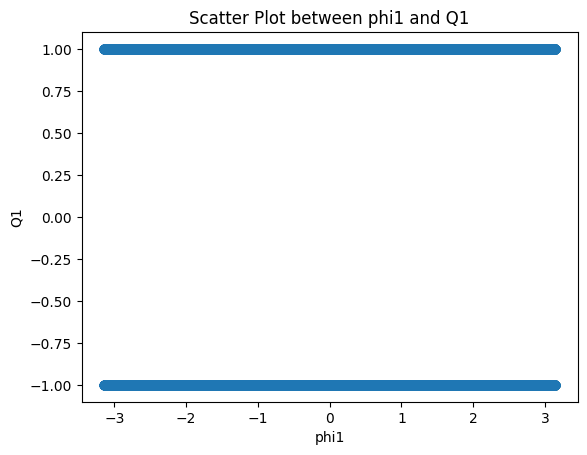

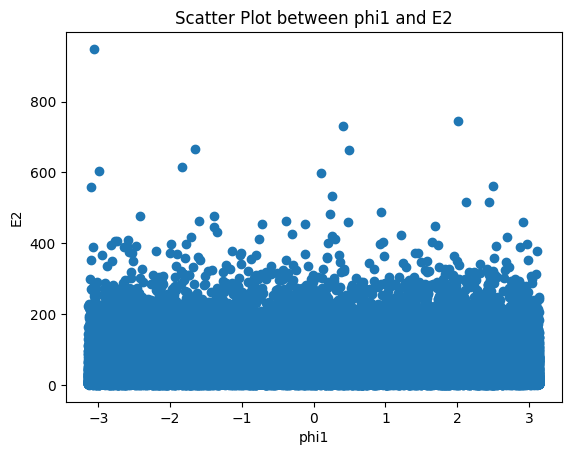

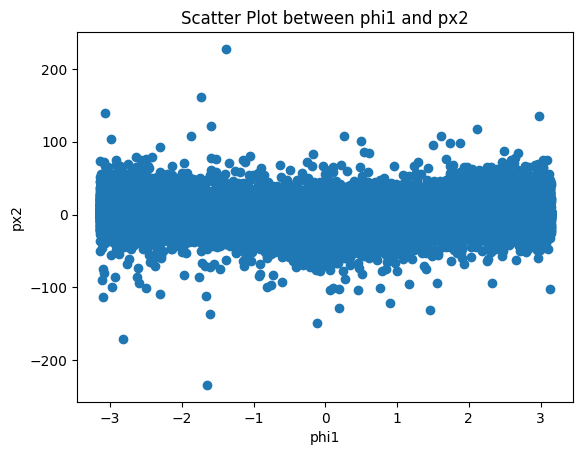

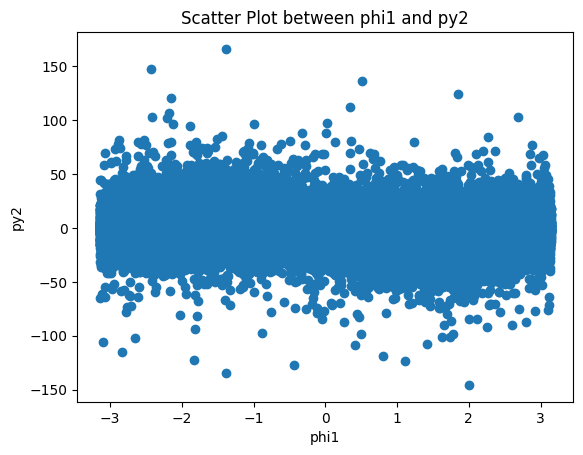

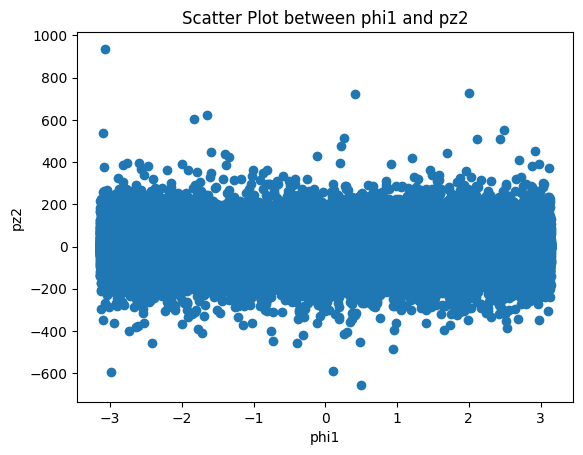

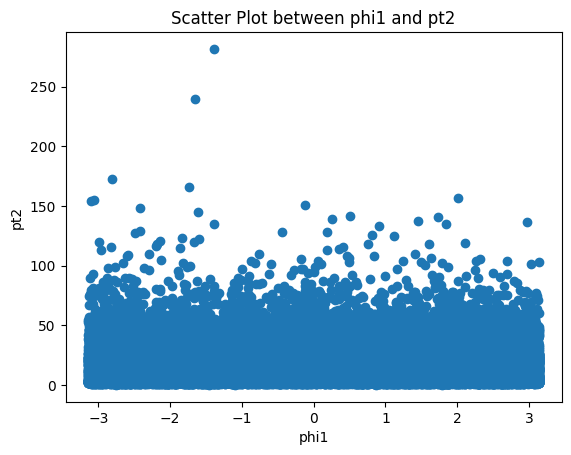

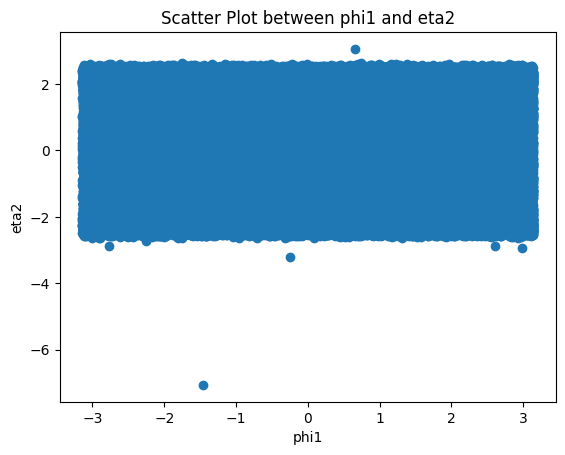

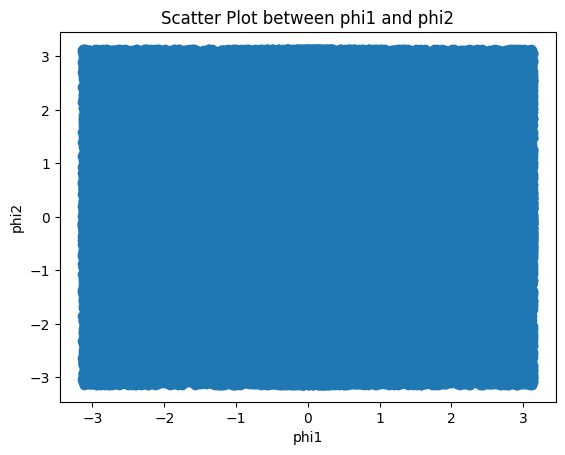

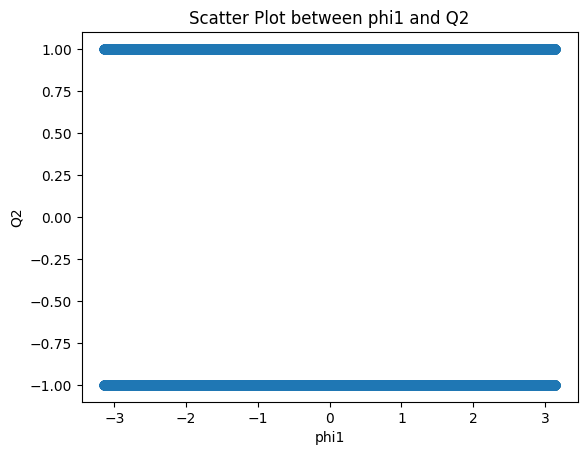

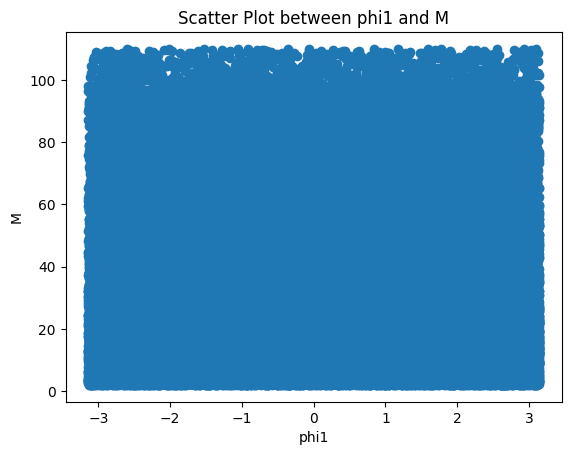

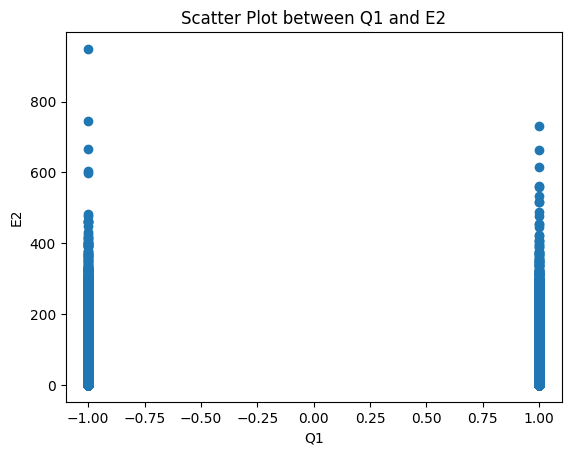

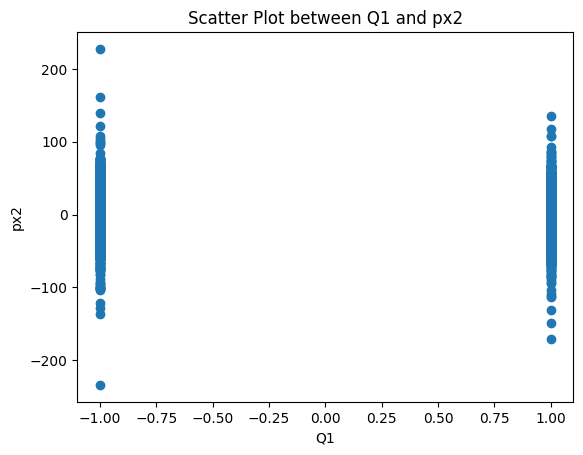

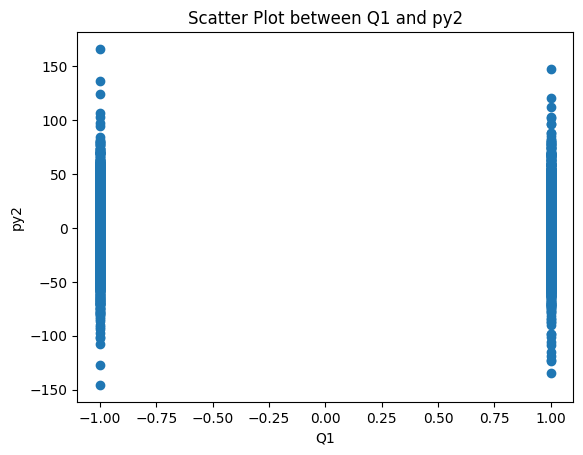

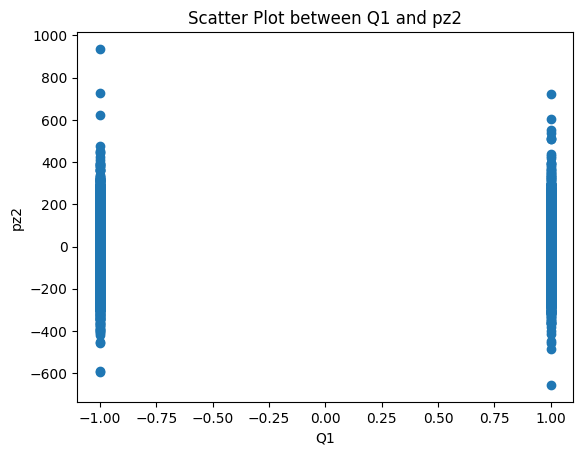

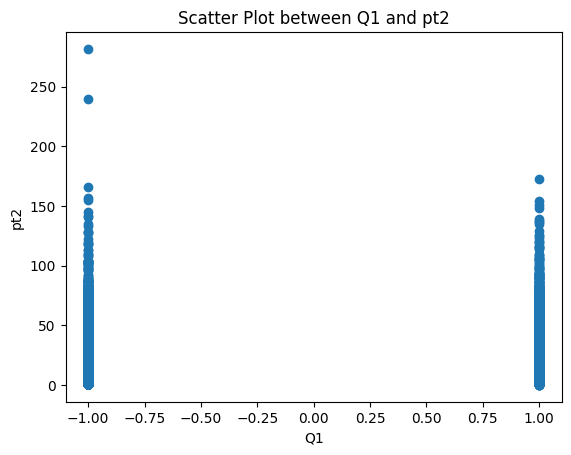

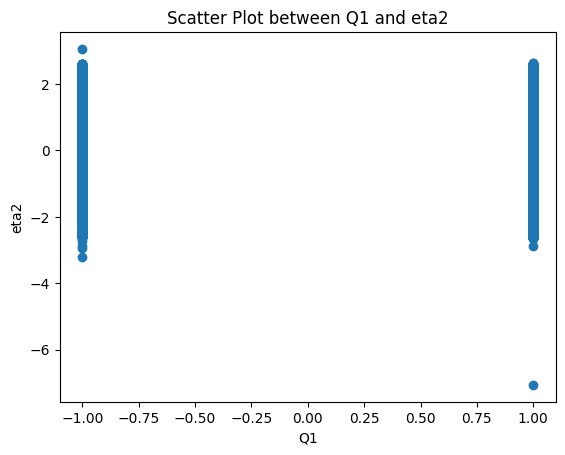

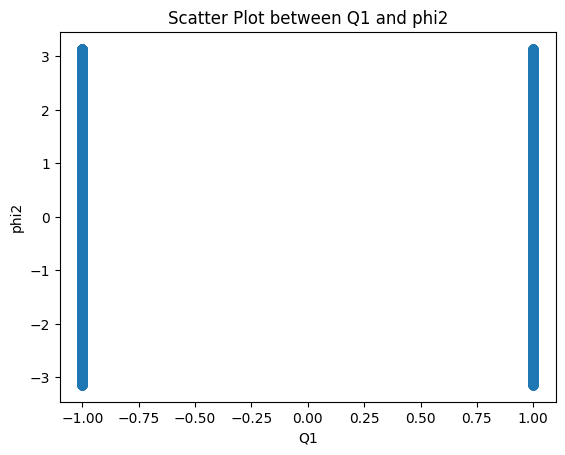

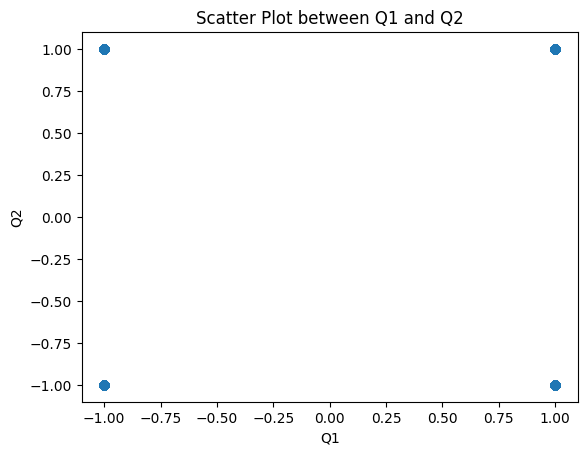

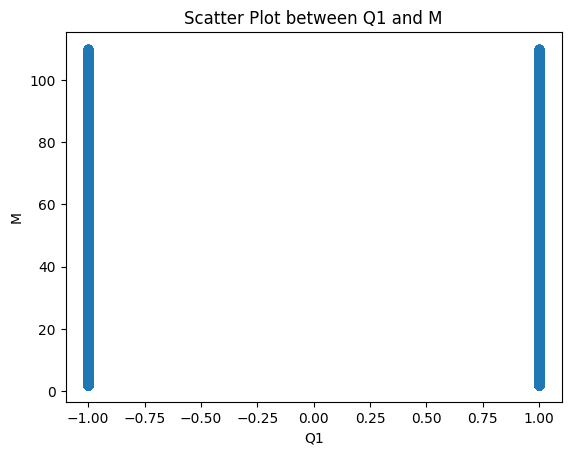

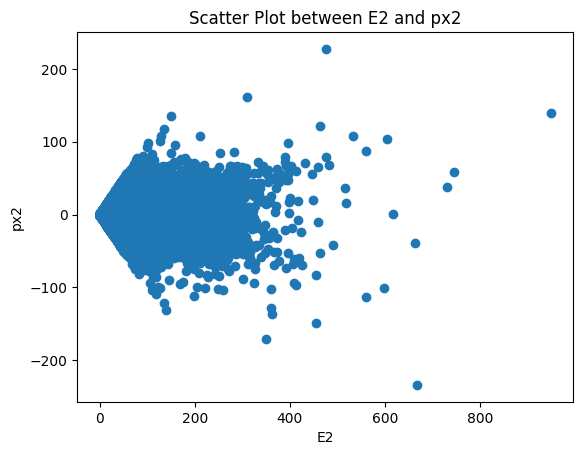

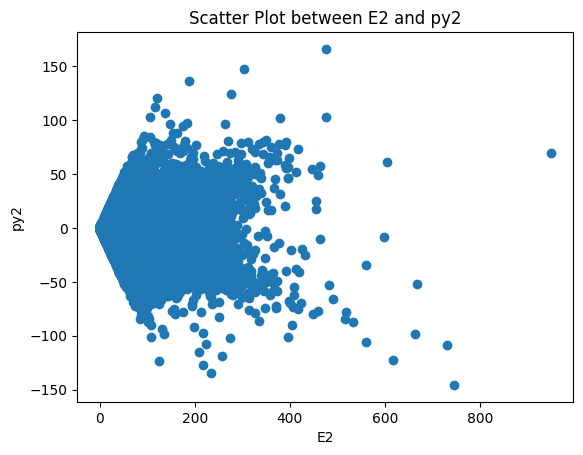

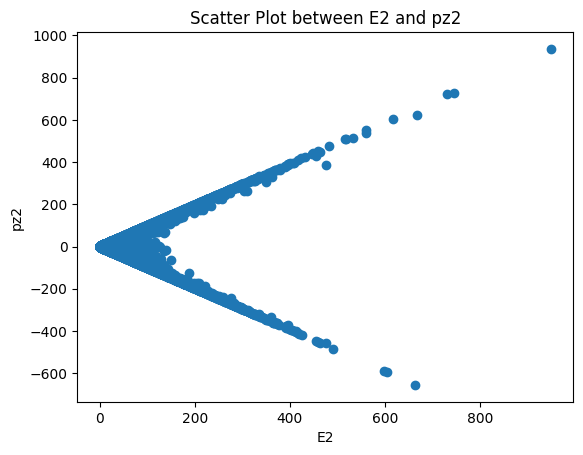

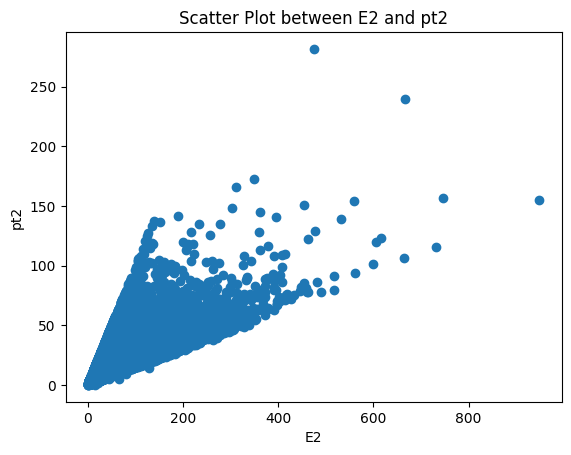

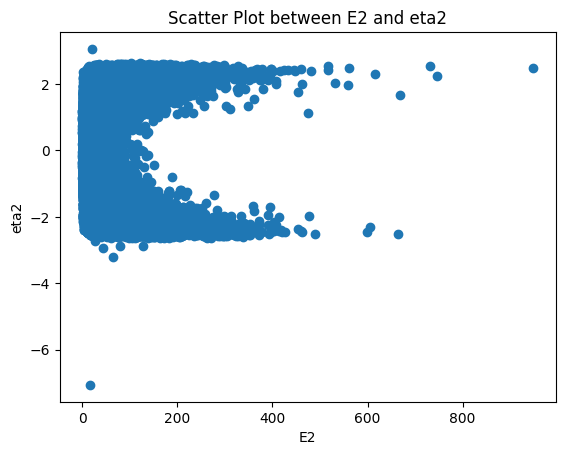

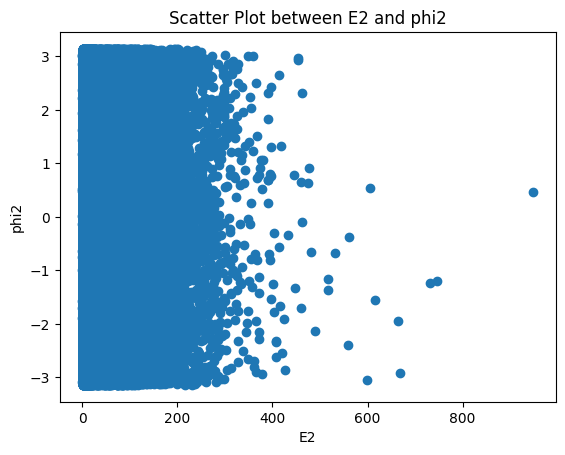

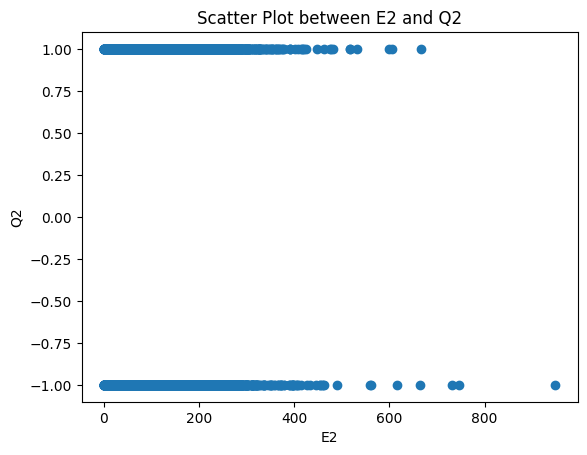

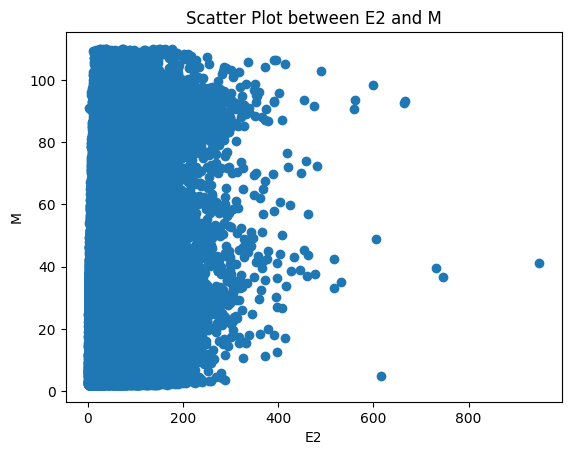

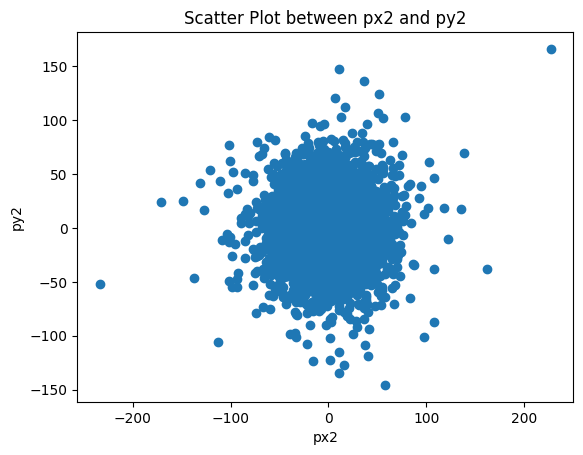

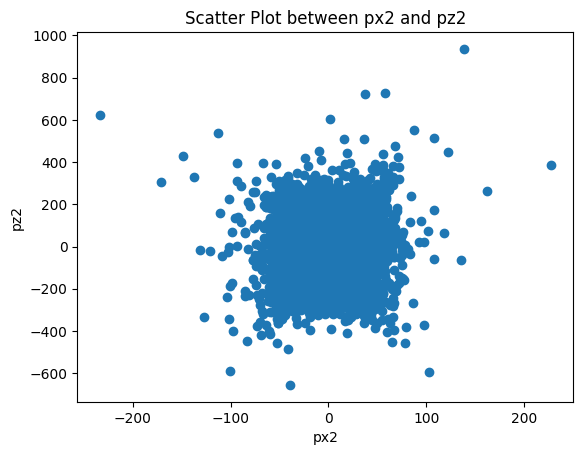

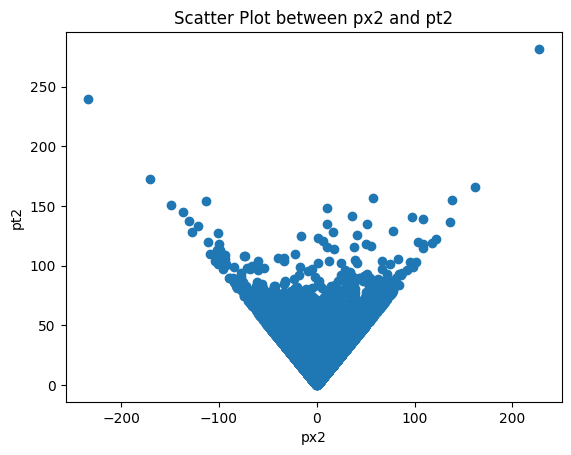

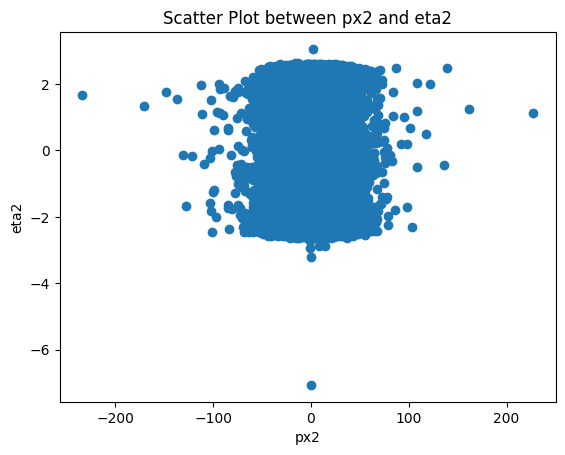

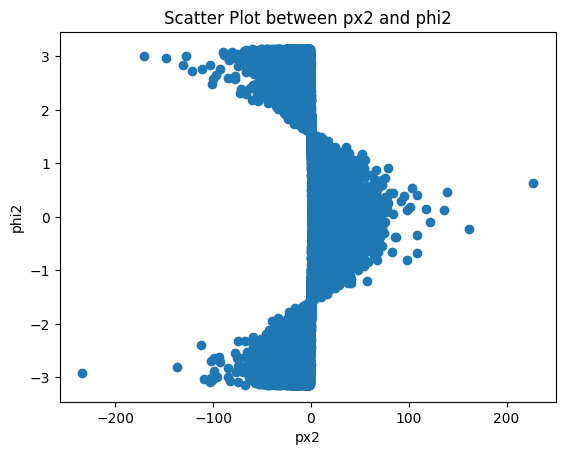

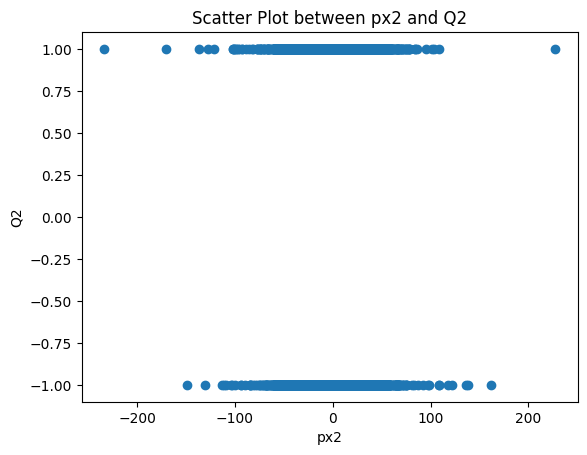

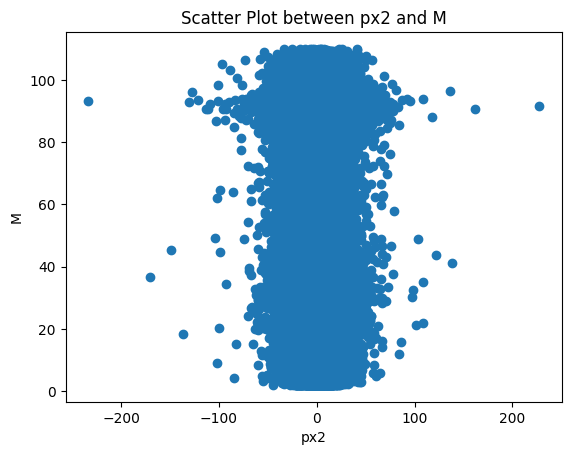

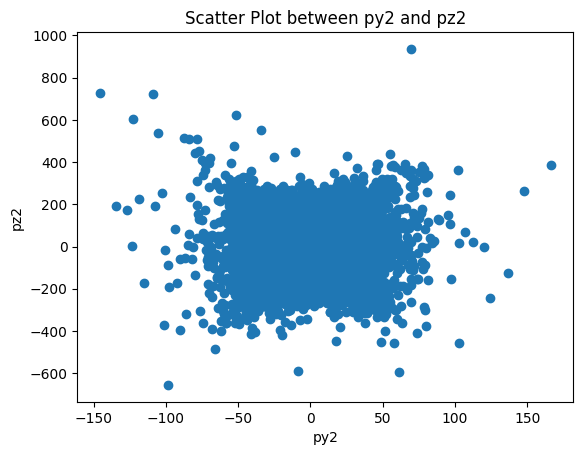

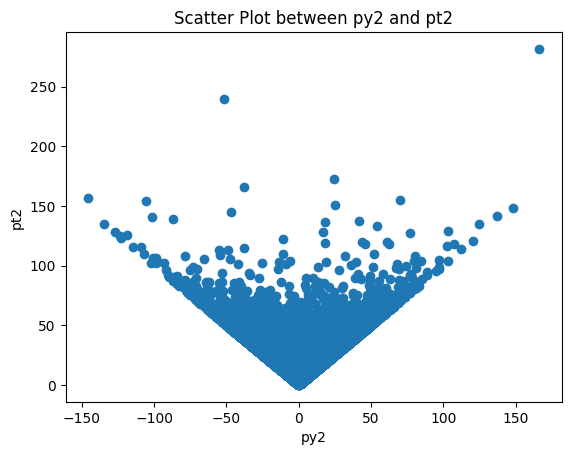

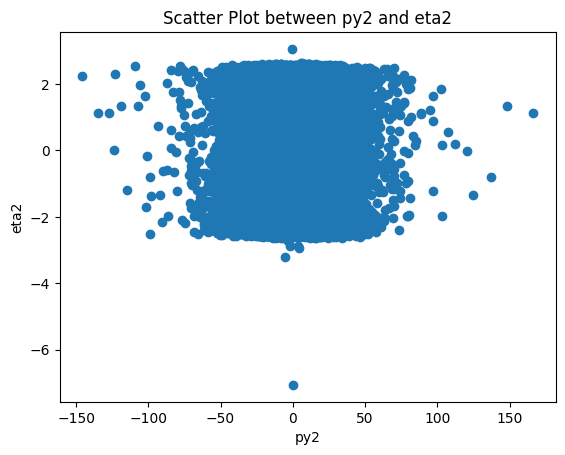

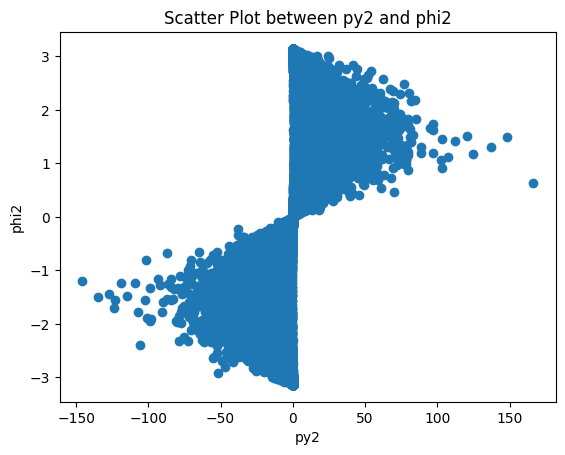

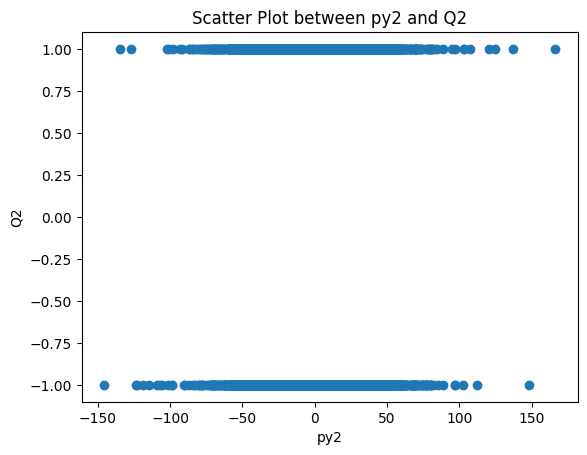

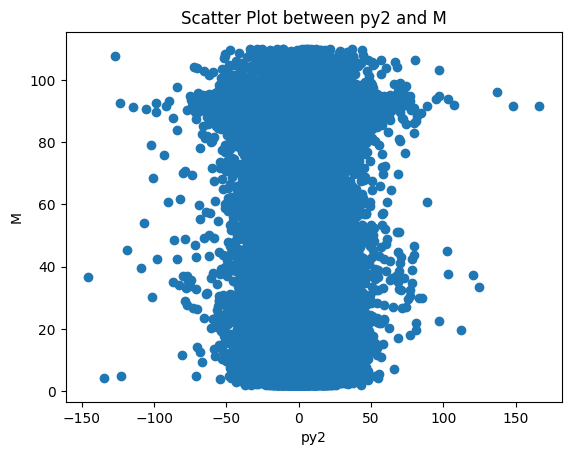

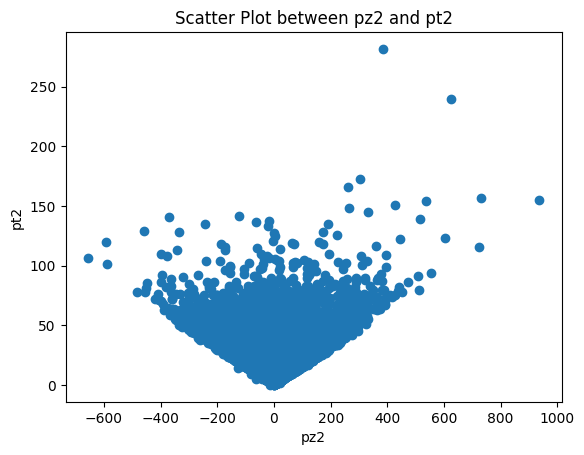

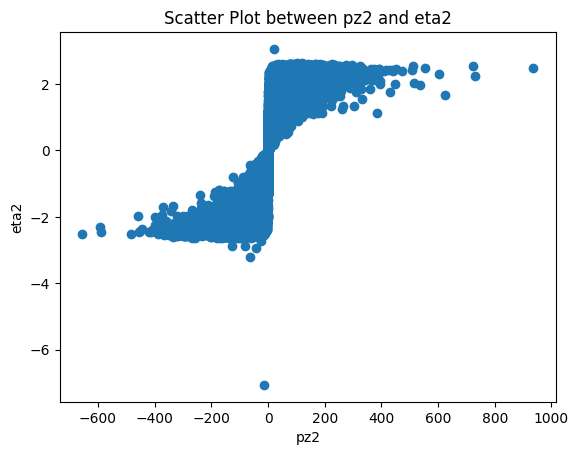

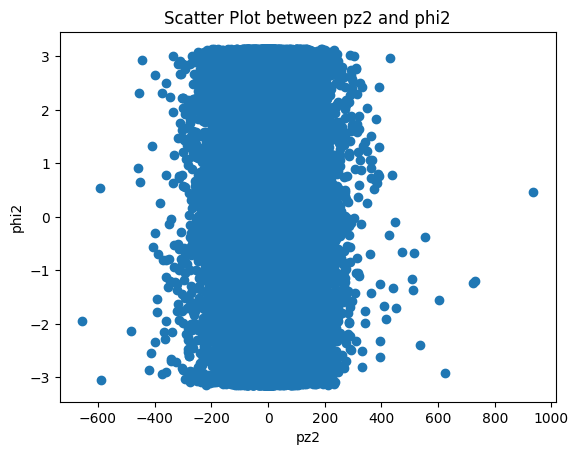

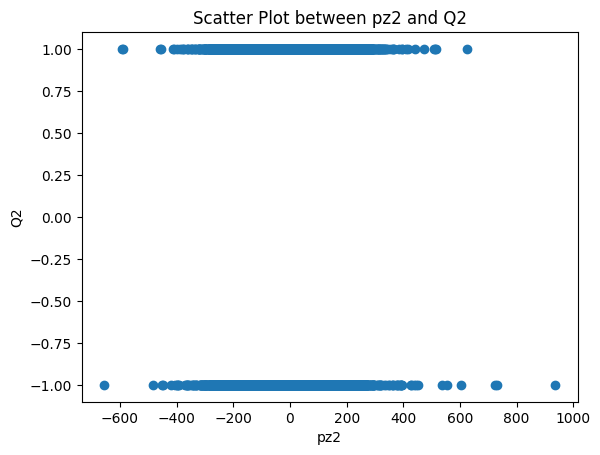

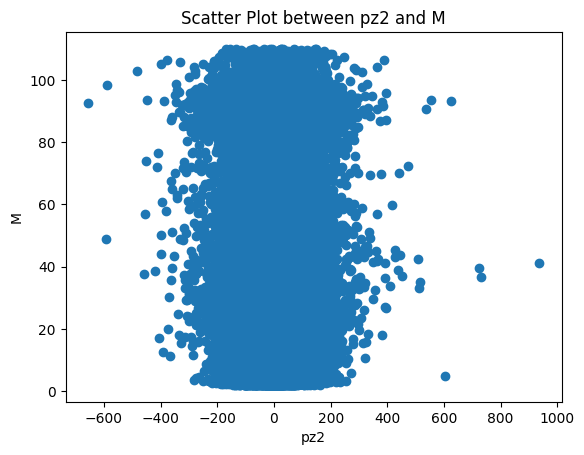

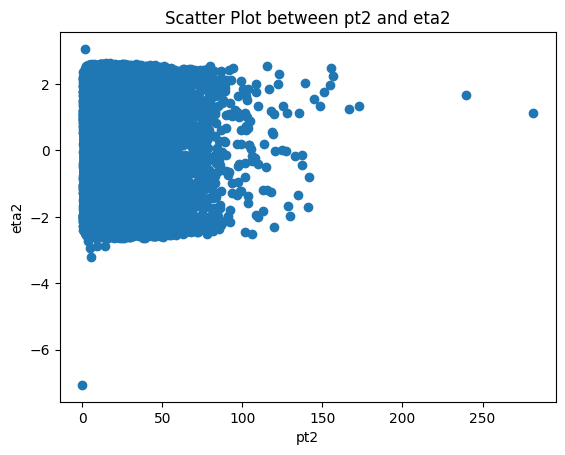

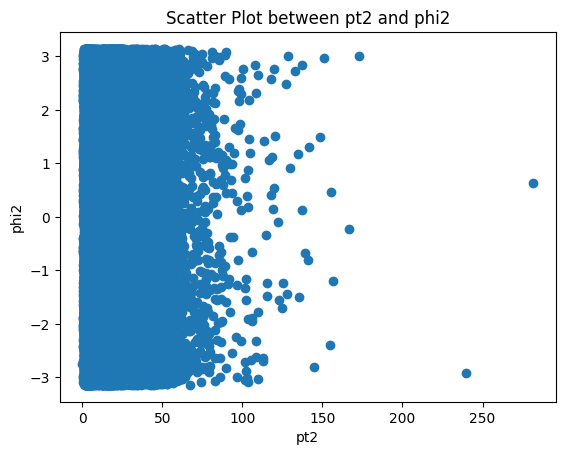

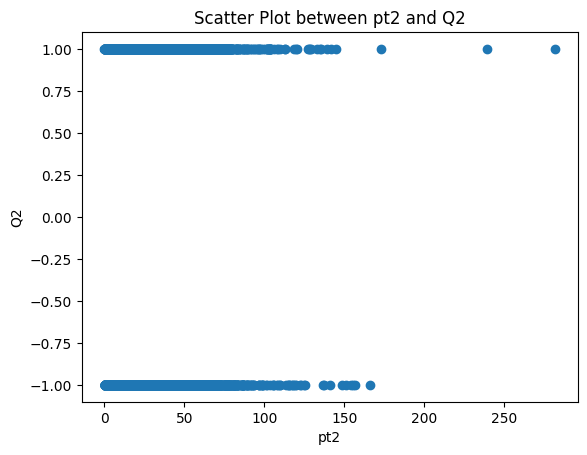

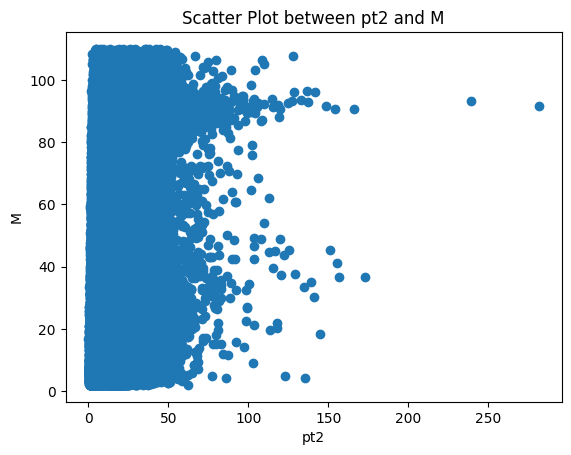

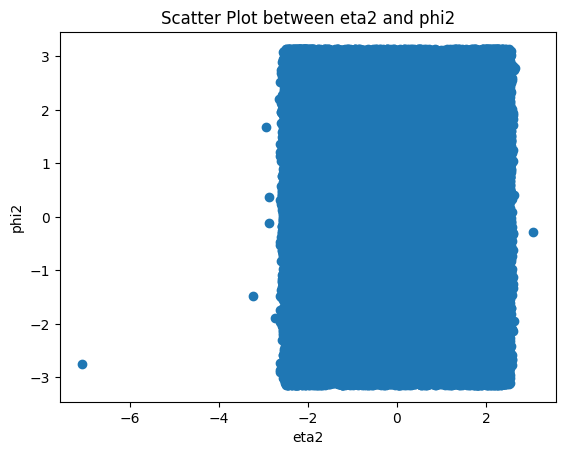

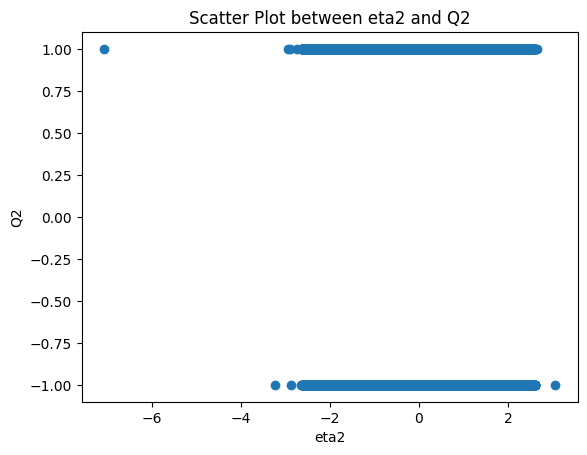

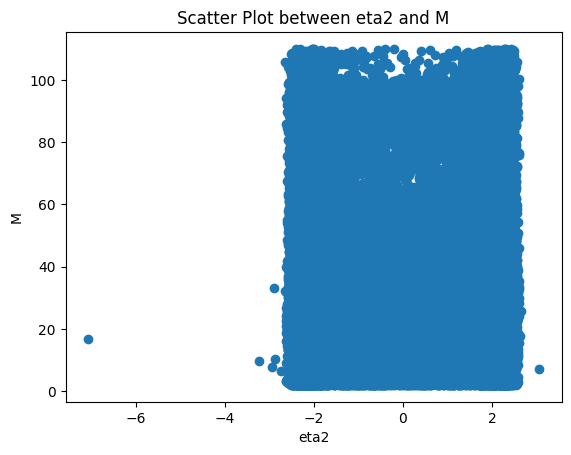

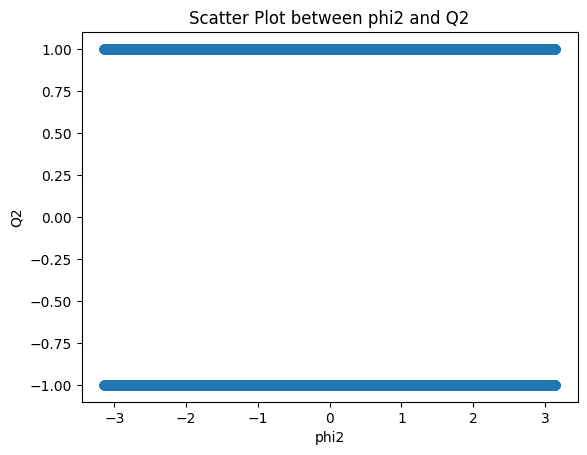

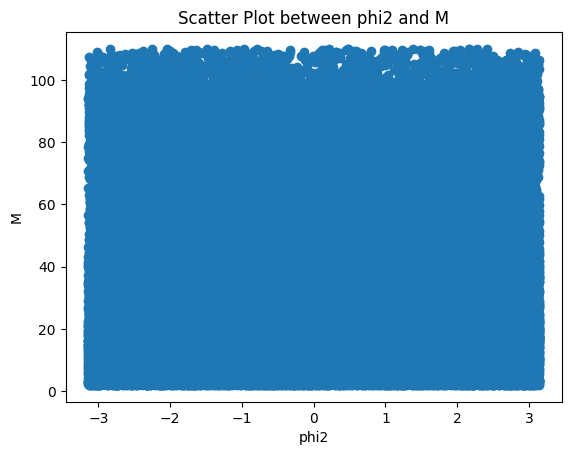

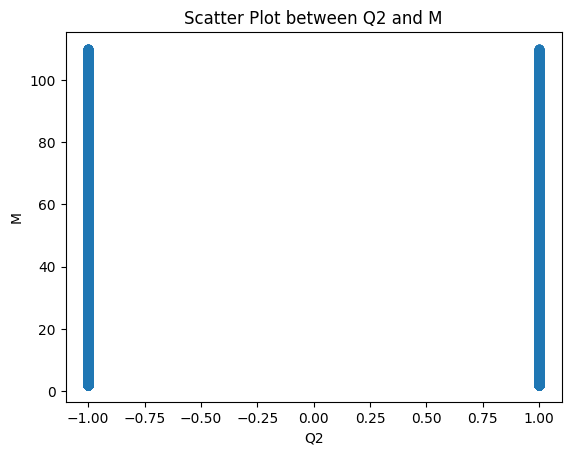

In [24]:
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        plt.scatter(df[df.columns[i]], df[df.columns[j]])
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j])
        plt.title('Scatter Plot between ' + df.columns[i] + ' and ' + df.columns[j])
        plt.show()


In [26]:
correlation_matrix = df.corr()

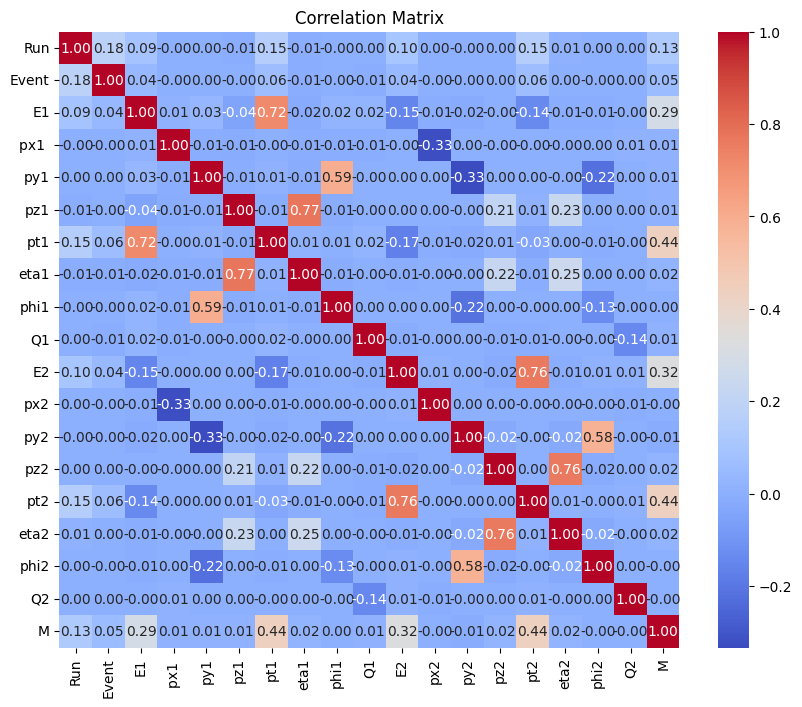

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

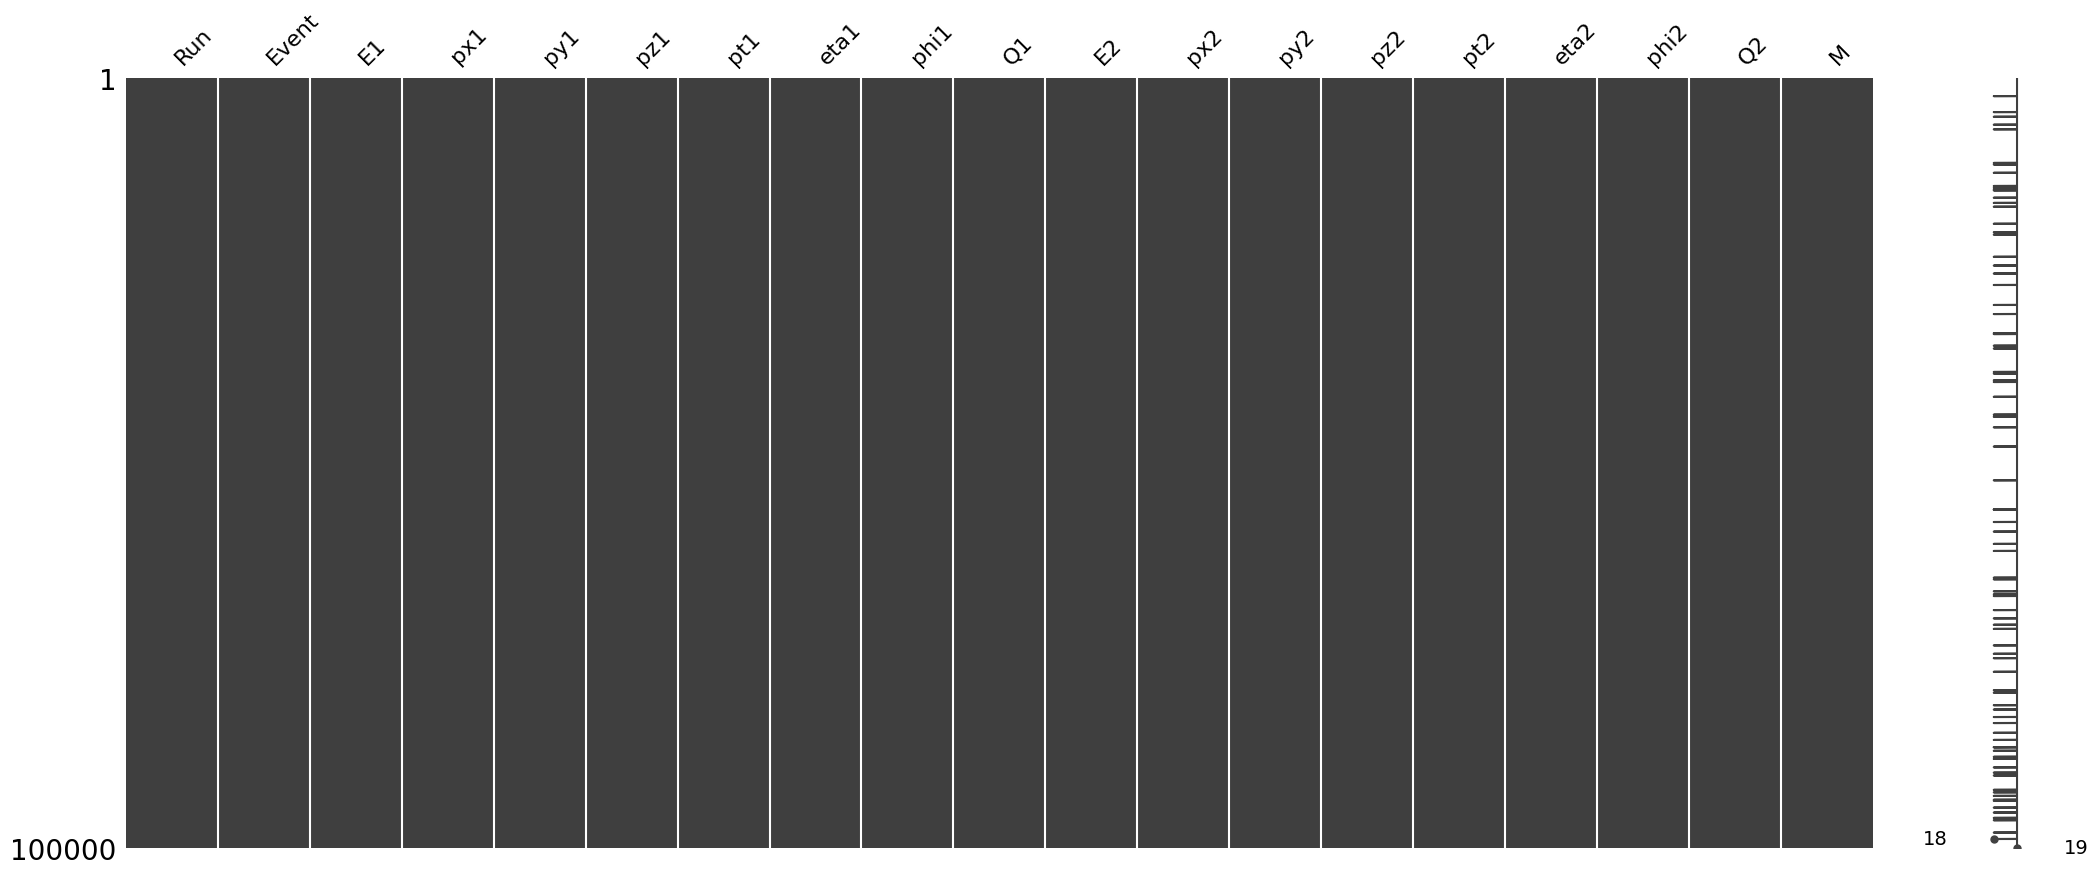

In [31]:

msno.matrix(df)
plt.show()


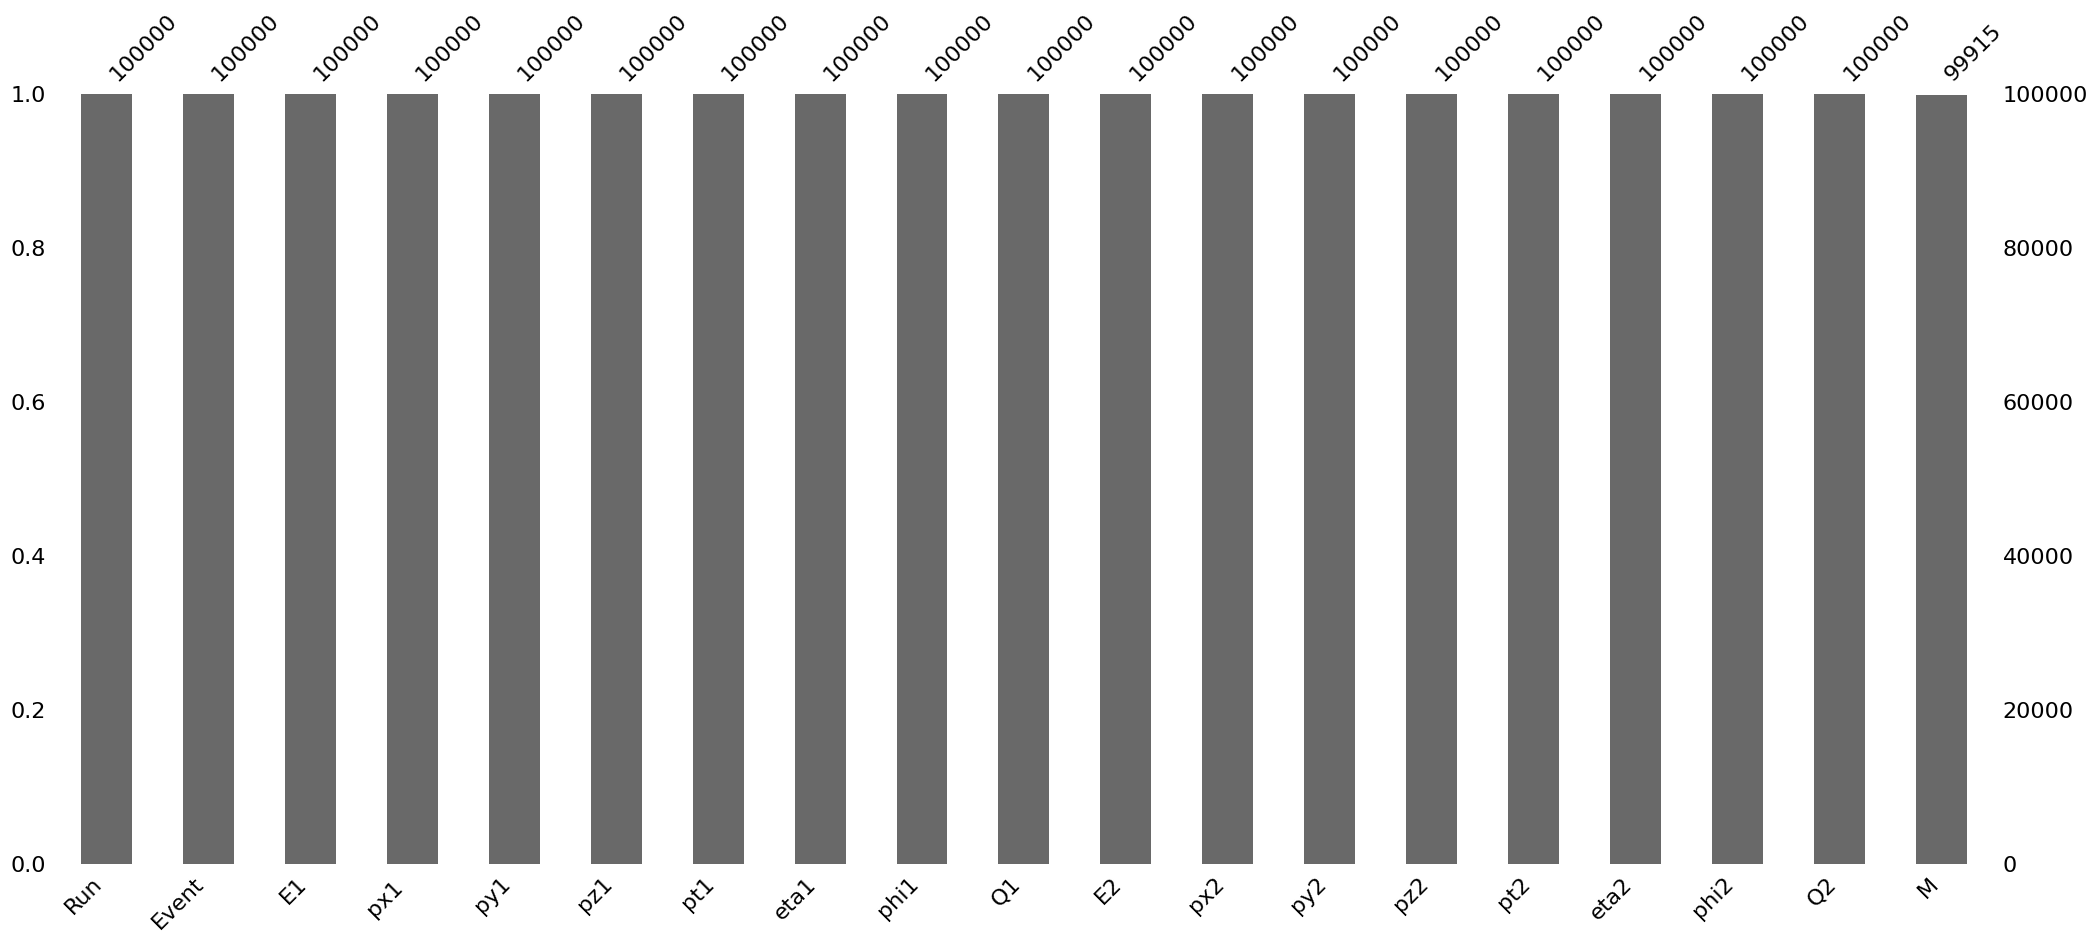

In [32]:
msno.bar(df)
plt.show()